# Summary of the Dataset

This dataset is a synthetic version inspired by the original Credit Risk dataset and enriched with additional variables based on Financial Risk for Loan Approval data. The dataset is structured for both categorical and continuous features.

The dataset contains 45,000 records (rows) and 14 variables (Columns), each described below:

**Column description**

1. person_age:-Age of the person (Float)
2. person_gender:- Gender of the person (Categorical)
3. person_education:-Highest education level (Categorical)
4. person_income:- Annual Income (Float)
5. person_emp_exp:-Years of employment experience (Integer)
6. person_home_ownership:-Home ownership status (e.g., rent, own, mortgage) (Categorical)
7. loan_amnt:- Loan amount requested (Float)
8. loan_intent:-Purpose of the loan (Categorical)
9. loan_int_rate:-Loan interest rate (Float)
10. loan_percent_income:- Loan amount as a percentage of annual income (Float)
11. cb_person_cred_hist_length:-Length of credit history in years (Float)
12. credit_score :- Credit score of the person (Integer)
13. previous_loan_defaults_on_file:-Indicator of previous loan defaults (Categorical)
14. loan_status (target variable):-Loan approval status: 1 = approved; 0 = rejected (Integer)

# Import Libraries & ML Models 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [2]:
df=pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\Campus X data scince _2024\lib practice\CAMPUSX\PROJECTS\loan.csv")
df

person_age person_gender person_education  person_income  \
0              22        female           Master          71948   
1              21        female      High School          12282   
2              25        female      High School          12438   
3              23        female         Bachelor          79753   
4              24          male           Master          66135   
...           ...           ...              ...            ...   
44995          27          male        Associate          47971   
44996          37        female        Associate          65800   
44997          33          male        Associate          56942   
44998          29          male         Bachelor          33164   
44999          24          male      High School          51609   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT      35000           PERSONAL   
1                   0                   OWN       1000          EDUCATION   
2                   3              MORTGAGE       5500            MEDICAL   
3                   0                  RENT      35000            MEDICAL   
4                   1                  RENT      35000            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT      15000            MEDICAL   
44996              17                  RENT       9000    HOMEIMPROVEMENT   
44997               7                  RENT       2771  DEBTCONSOLIDATION   
44998               4                  RENT      12000          EDUCATION   
44999               1                  RENT       6665  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                           3   
1              11.14                 0.08                           2   
2              12.87                 0.44                           3   
3              15.23                 0.44                           2   
4              14.27                 0.53                           4   
...              ...                  ...                         ...   
44995          15.66                 0.31                           3   
44996          14.07                 0.14                          11   
44997          10.02                 0.05                          10   
44998          13.23                 0.36                           6   
44999          17.05                 0.13                           3   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

# Assesment of the data

In [3]:
df.duplicated().sum()   # No duplicate rows found

0

In [4]:
df.isnull().sum()   # No Missing values found in the features

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Seperating categorical & Numerical columns

In [6]:
cat_col = df.select_dtypes(include=['object', 'category'])  # Categorical columns
cat_col

person_gender person_education person_home_ownership        loan_intent  \
0            female           Master                  RENT           PERSONAL   
1            female      High School                   OWN          EDUCATION   
2            female      High School              MORTGAGE            MEDICAL   
3            female         Bachelor                  RENT            MEDICAL   
4              male           Master                  RENT            MEDICAL   
...             ...              ...                   ...                ...   
44995          male        Associate                  RENT            MEDICAL   
44996        female        Associate                  RENT    HOMEIMPROVEMENT   
44997          male        Associate                  RENT  DEBTCONSOLIDATION   
44998          male         Bachelor                  RENT          EDUCATION   
44999          male      High School                  RENT  DEBTCONSOLIDATION   

      previous_loan_defaults_on_file  
0                                 No  
1                                Yes  
2                                 No  
3                                 No  
4                                 No  
...                              ...  
44995                             No  
44996                             No  
44997                             No  
44998                             No  
44999                             No  

[45000 rows x 5 columns]

In [7]:
num_col = df.select_dtypes(exclude=['object', 'category'])  # Numerical columns
num_col

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0              22          71948               0      35000          16.02   
1              21          12282               0       1000          11.14   
2              25          12438               3       5500          12.87   
3              23          79753               0      35000          15.23   
4              24          66135               1      35000          14.27   
...           ...            ...             ...        ...            ...   
44995          27          47971               6      15000          15.66   
44996          37          65800              17       9000          14.07   
44997          33          56942               7       2771          10.02   
44998          29          33164               4      12000          13.23   
44999          24          51609               1       6665          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                           3           561   
1                     0.08                           2           504   
2                     0.44                           3           635   
3                     0.44                           2           675   
4                     0.53                           4           586   
...                    ...                         ...           ...   
44995                 0.31                           3           645   
44996                 0.14                          11           621   
44997                 0.05                          10           668   
44998                 0.36                           6           604   
44999                 0.13                           3           628   

       loan_status  
0                1  
1                0  
2                1  
3                1  
4                1  
...            ...  
44995            1  
44996            1  
44997            1  
44998            1  
44999            1  

[45000 rows x 9 columns]

In [8]:
for i in cat_col:                    # levels & its counts under each categorical columns
    print(i)
    print(cat_col[i].value_counts())
    print('*'*50)

person_gender
male      24841
female    20159
Name: person_gender, dtype: int64
**************************************************
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: person_education, dtype: int64
**************************************************
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: person_home_ownership, dtype: int64
**************************************************
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: loan_intent, dtype: int64
**************************************************
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: previous_loan_defaults_on_file, dtype: int64
**************************************************


In [9]:
df.describe().round(2)

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
count    45000.00       45000.00        45000.00   45000.00       45000.00   
mean        27.76       80319.05            5.41    9583.16          11.01   
std          6.05       80422.50            6.06    6314.89           2.98   
min         20.00        8000.00            0.00     500.00           5.42   
25%         24.00       47204.00            1.00    5000.00           8.59   
50%         26.00       67048.00            4.00    8000.00          11.01   
75%         30.00       95789.25            8.00   12237.25          12.99   
max        144.00     7200766.00          125.00   35000.00          20.00   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
count             45000.00                    45000.00      45000.00   
mean                  0.14                        5.87        632.61   
std                   0.09                        3.88         50.44   
min                   0.00                        2.00        390.00   
25%                   0.07                        3.00        601.00   
50%                   0.12                        4.00        640.00   
75%                   0.19                        8.00        670.00   
max                   0.66                       30.00        850.00   

       loan_status  
count     45000.00  
mean          0.22  
std           0.42  
min           0.00  
25%           0.00  
50%           0.00  
75%           0.00  
max           1.00

**Key Observations_1:**

**Person_age**-The average age is 27.76 years, with a minimum of 20 and a maximum of 144 (possible outlier).
The interquartile range (IQR) suggests most ages lie between 24 and 30 years.


**Person_income**-The Avg income is ₹80,319.05, with a minimum of ₹8,000 and a maximum of ₹7,200,766 (large range, likely indicating outliers or high variance).
Income at the 75th percentile is ₹95,789.25, indicating that a significant portion of individuals earns less than this amount.

**Person_emp_exp**- The average exp is 5.5 yrs with maximum of 125 yrs(likely outliers).

**Loan amount**-The average loan amount is ₹9,583, with loans ranging from ₹500 to ₹35,000.
The median loan amount (50th percentile) is ₹8,000, showing a central tendency.

**Loan_int_rate**-Loan payment constitute 11% (mean) of income on average, with a maximum of 20%. This suggests a range of affordability for borrowers.

**Loan_percent_income**-The average loan percent of his income is 14% with max of 66% (likely outliers).

**Person_cred_hist**- Mean of credit history is 6 yrs with max of30 yrs(likely outliers).

**Credit_score**-Average credit score is 632.61, with a minimum of 390 and a maximum of 850 (industry standard maximum).

# Univariate Analysis

1. Analysis  of Categorical features

In [15]:
cat_col.head()

person_gender person_education person_home_ownership loan_intent  \
0        female           Master                  RENT    PERSONAL   
1        female      High School                   OWN   EDUCATION   
2        female      High School              MORTGAGE     MEDICAL   
3        female         Bachelor                  RENT     MEDICAL   
4          male           Master                  RENT     MEDICAL   

  previous_loan_defaults_on_file  
0                             No  
1                            Yes  
2                             No  
3                             No  
4                             No

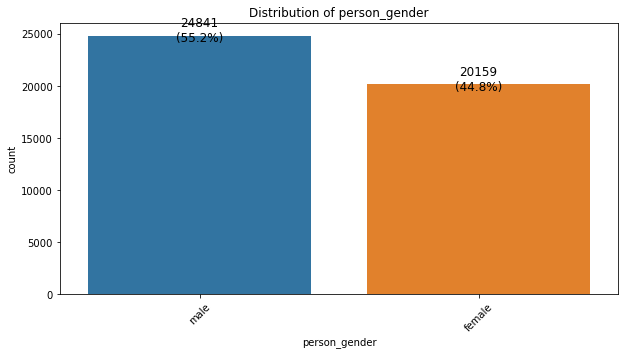

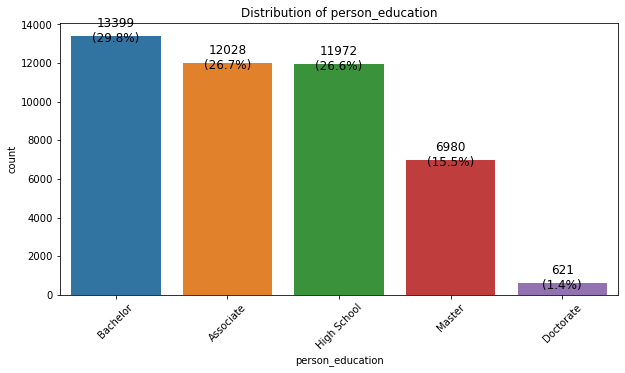

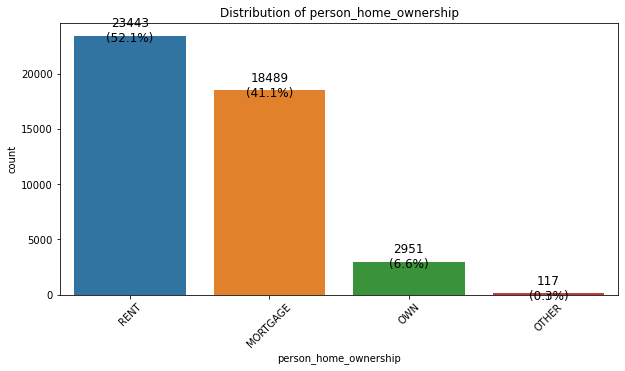

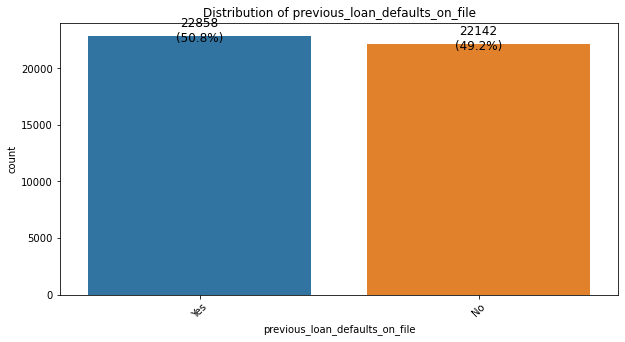

In [25]:
# Univariate analysis of categorical features

for col in cat_col:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

    # Calculate the total count
    total = len(df)

    # Add numbers and percentages on top of the bars
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    plt.show()


**Key Observation_2**- Above graphs are self explanatory

1. 52% of loan applicants are renters.

2. 30% of loan applicants have a Bachelor's degree, while only 1.4% hold a Doctorate.

3. 20% of the applicants applied for education loans, and 19% applied for medical loans.

In [27]:
num_col.head()

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0          22          71948               0      35000          16.02   
1          21          12282               0       1000          11.14   
2          25          12438               3       5500          12.87   
3          23          79753               0      35000          15.23   
4          24          66135               1      35000          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  
0                 0.49                           3           561            1  
1                 0.08                           2           504            0  
2                 0.44                           3           635            1  
3                 0.44                           2           675            1  
4                 0.53                           4           586            1

2. Analysis of Numerical features using Histogram plot

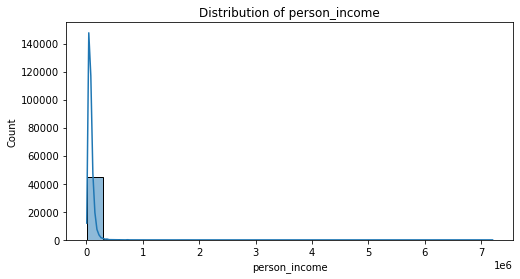

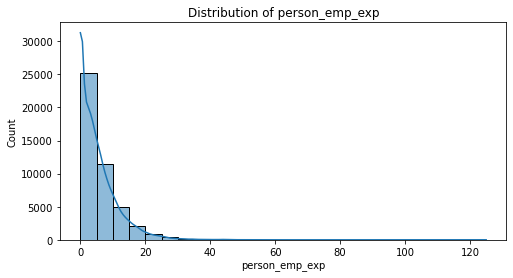

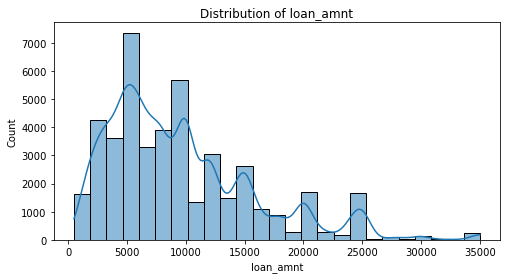

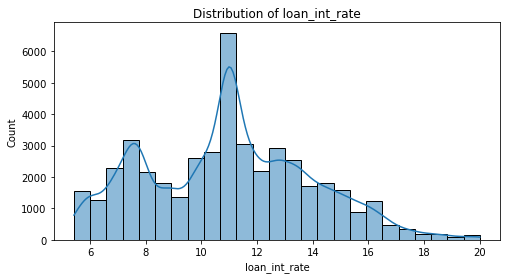

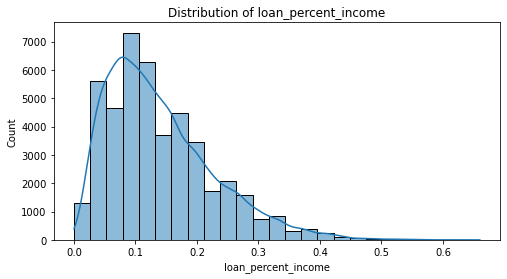

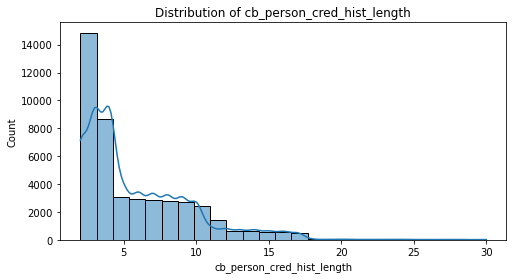

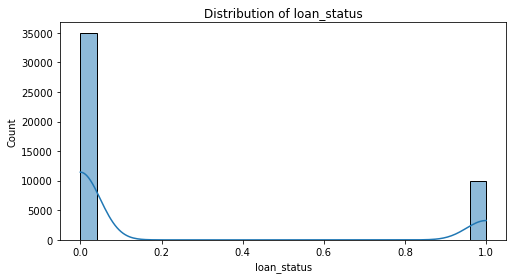

In [31]:
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=25)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

In [35]:
for i in num_col:
    print(i,"==",num_col[i].skew().round(2))
    num_col[i].skew()
    

person_age == 2.55
person_income == 34.14
person_emp_exp == 2.59
loan_amnt == 1.18
loan_int_rate == 0.21
loan_percent_income == 1.03
cb_person_cred_hist_length == 1.63
credit_score == -0.61
loan_status == 1.34


**Key Observation_3-**

**1. person_age** = 2.55:

**Positive skew**- This is a high value, which suggests that the data is right-skewed, meaning most individuals in the dataset have lower ages, but there are some older individuals that are pulling the mean to the right.

**2. person_income** = 34.14:

Positive skew- A skewness of 34.14 suggests that most people in the dataset have lower incomes, but there are a few high-income individuals creating a right tail.

**3.person_emp_exp** = 2.59:

Positive skew- This value suggests that the employment experience is also right-skewed, meaning many individuals have less experience, but a few have more, pulling the skew to the right.

**4.loan_amnt** = 1.18:

Positive skew- This indicates that most of the loan amounts are smaller, with a few larger loans pushing the mean to the right.

**loan_int_rate** = 0.21:

Near normal distribution- A skewness value near 0 suggests that the interest rates are fairly evenly distributed, with no strong skew in either direction.

**loan_percent_income** = 1.03:

Positive skew- This suggests that the percentage of income allocated to loan repayments is slightly positive skew

**Cb_person_cred_hist_length** = 1.63:

Positive skew- This indicates that many individuals have a shorter credit history, but a few have long histories, pushing the mean to the right.

**credit_score** = -0.61:

Negative skew- This is somewhat unusual. It suggests that most of the credit scores in the dataset are higher, with a few low scores dragging the average to the left. However, this could be a z-score, indicating a transformation of the data.


3. Analysis of Numerical features using Box plot

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


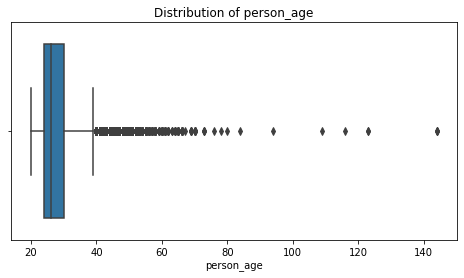

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


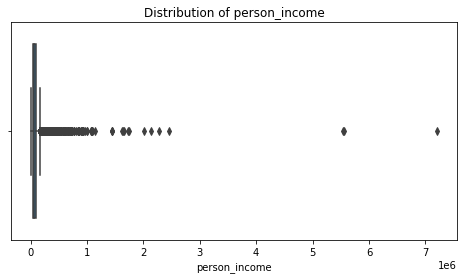

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


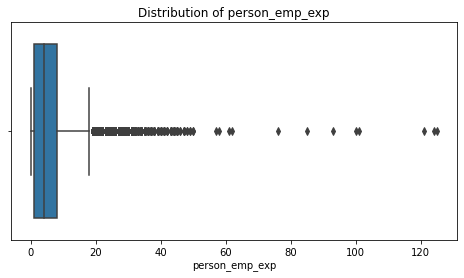

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


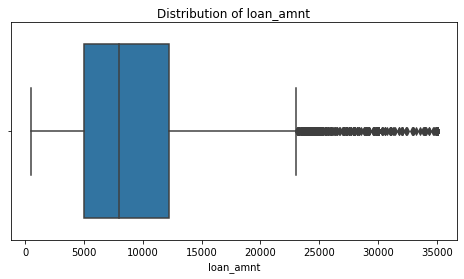

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


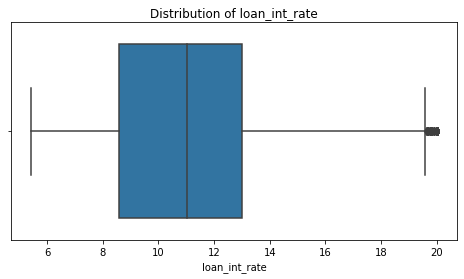

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


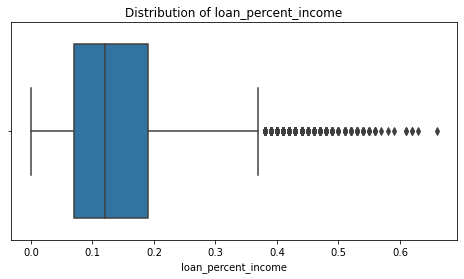

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


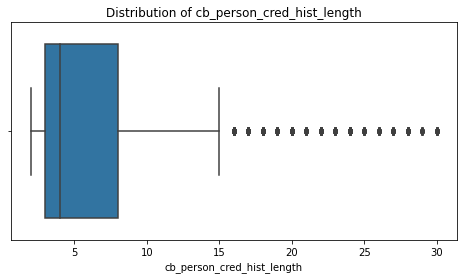

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


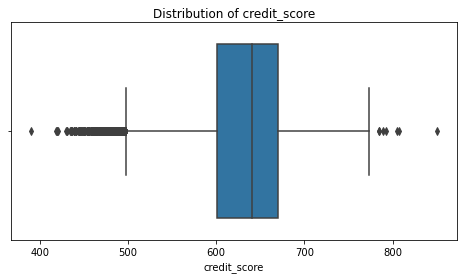

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


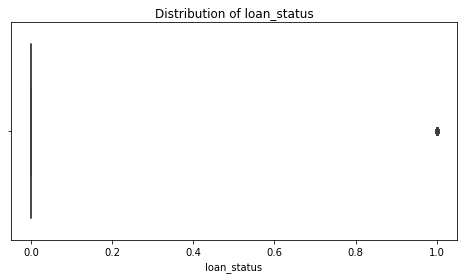

In [37]:
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


**Key Observation_4:-**

Need to handle outliers in age,income,experience,and credit_score

# Bivariate Analysis

1. Categorical vs Numerical using Box plot 

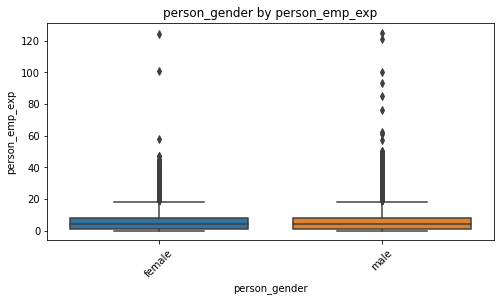

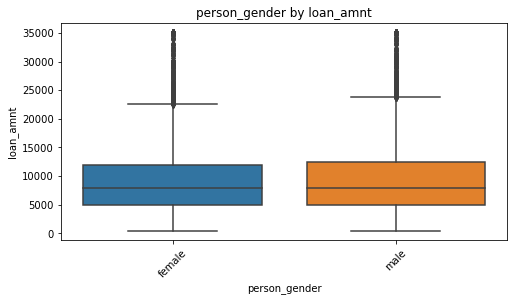

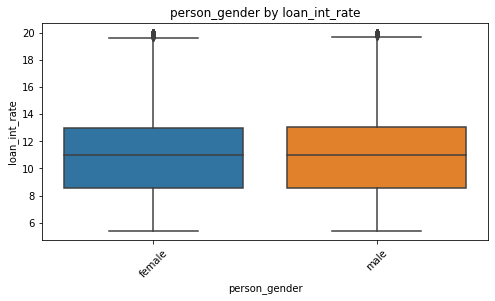

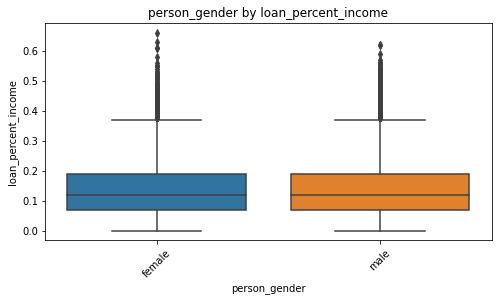

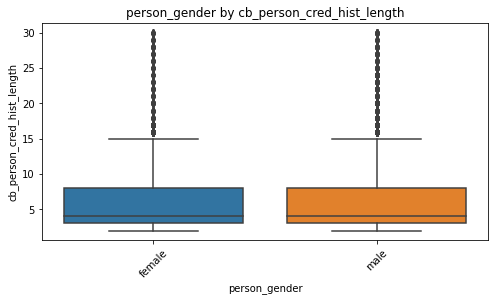

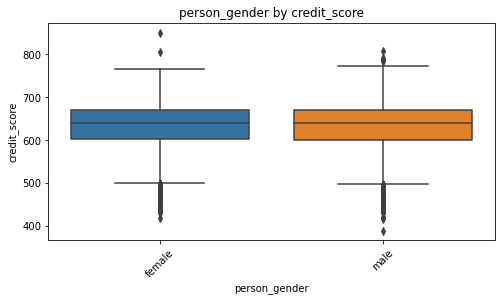

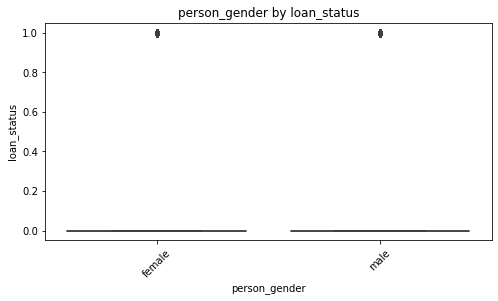

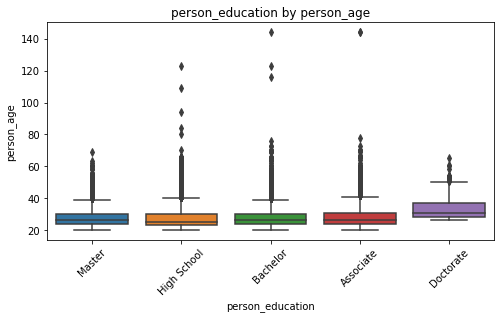

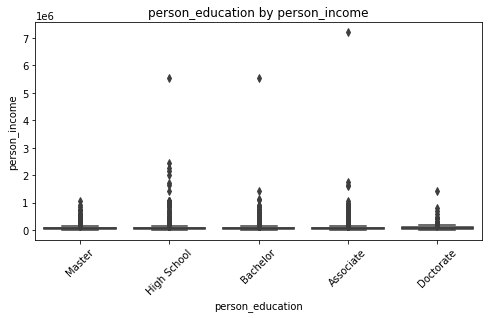

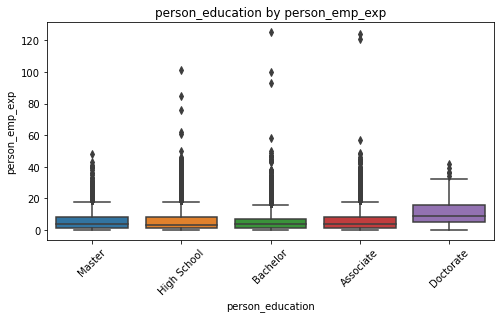

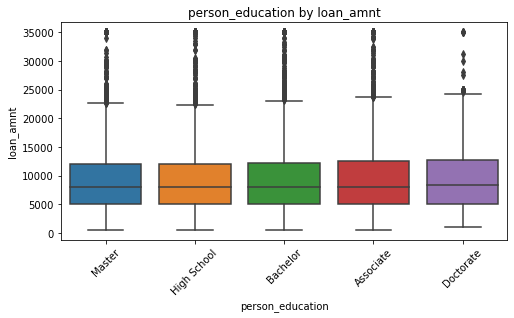

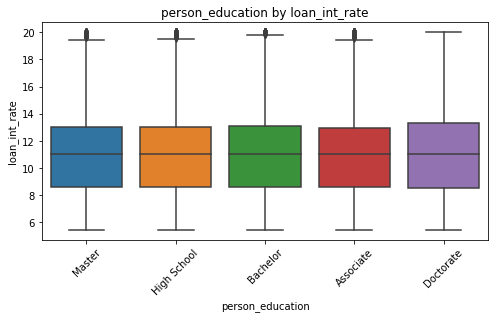

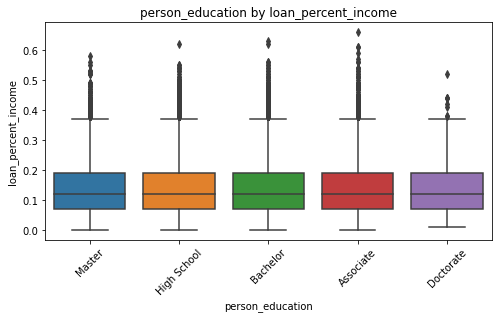

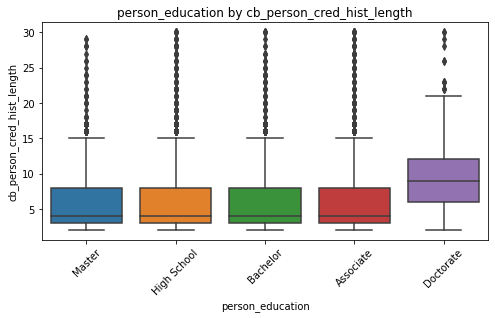

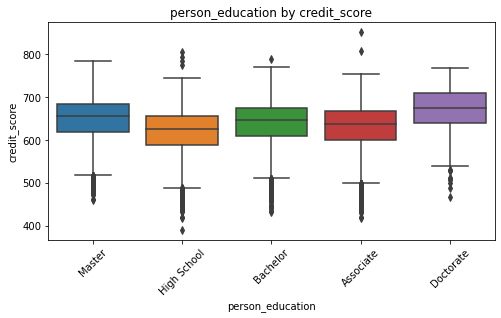

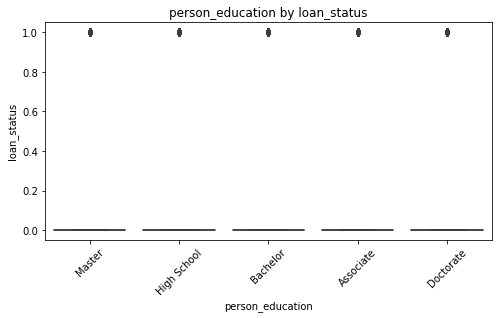

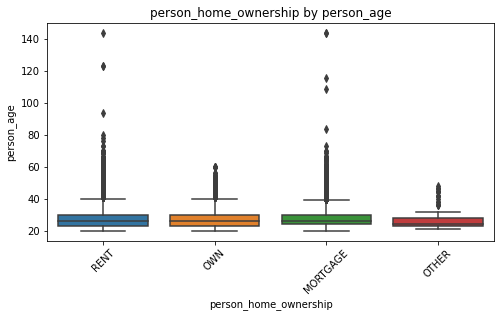

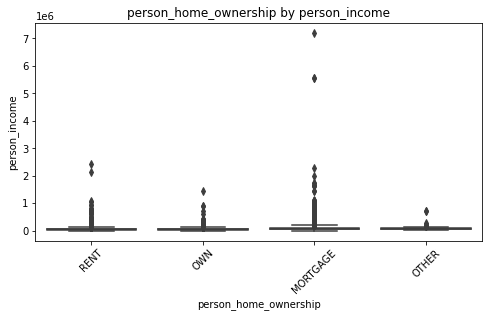

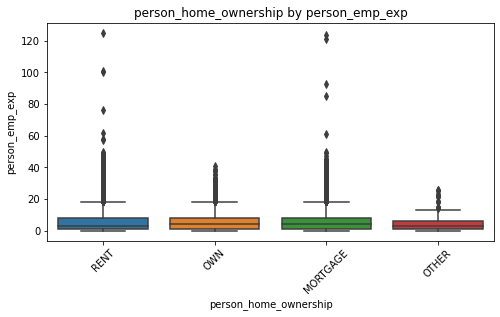

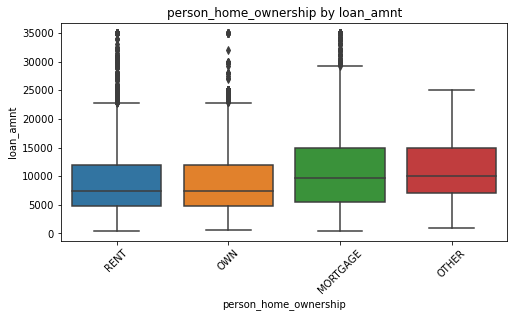

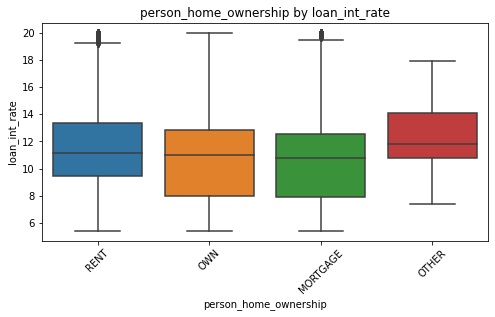

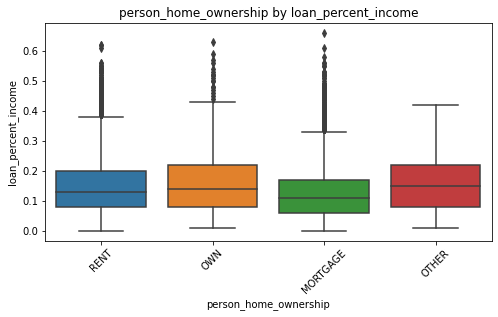

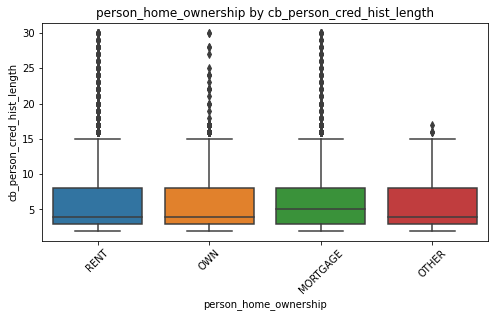

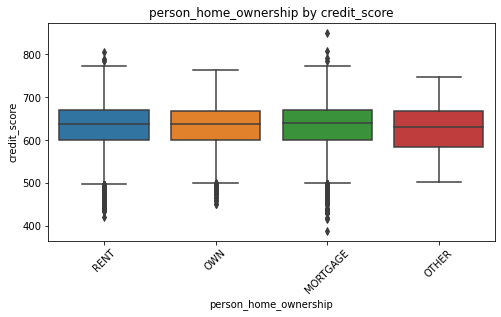

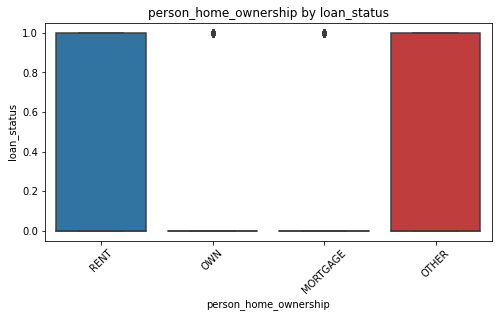

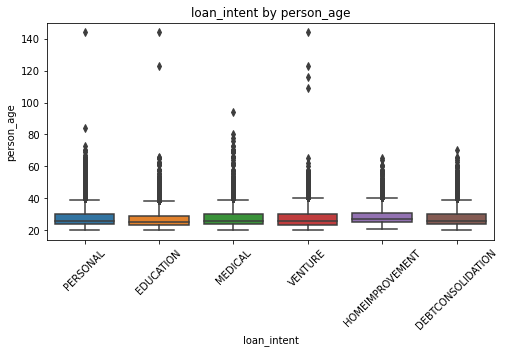

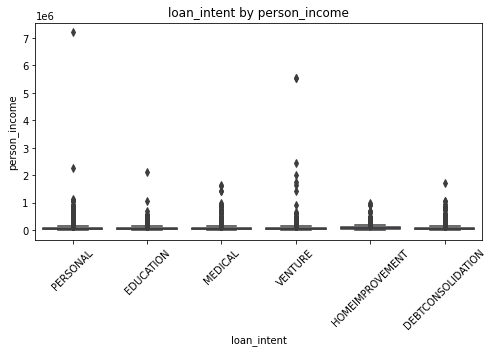

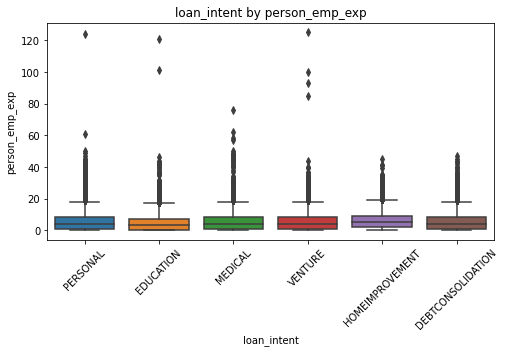

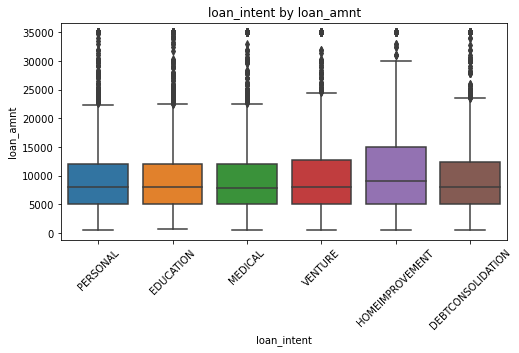

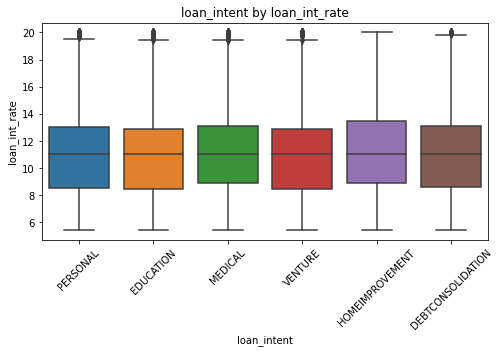

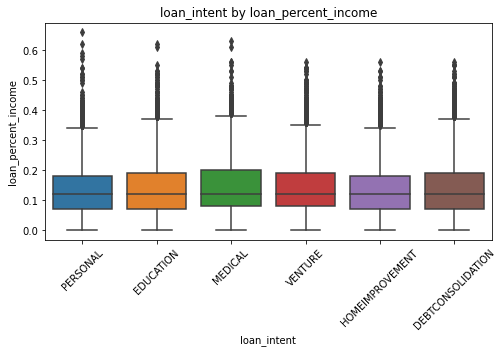

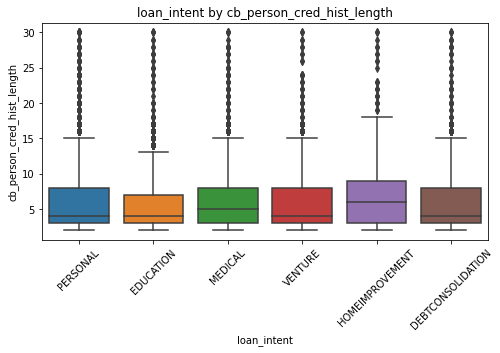

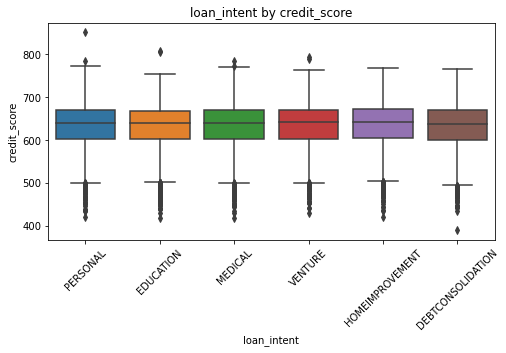

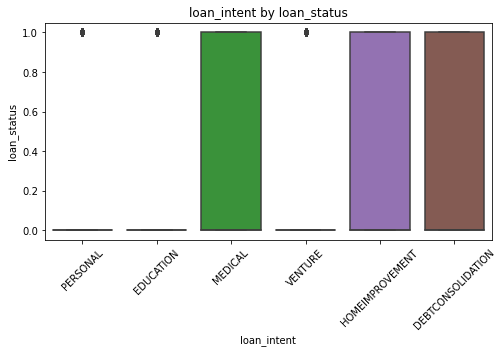

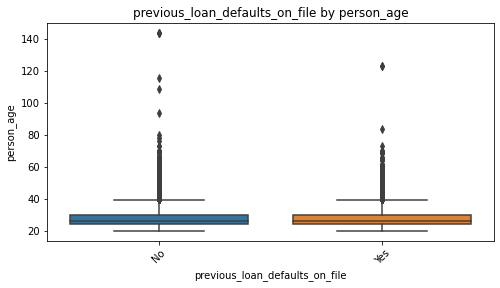

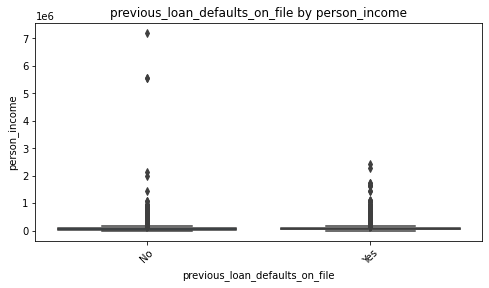

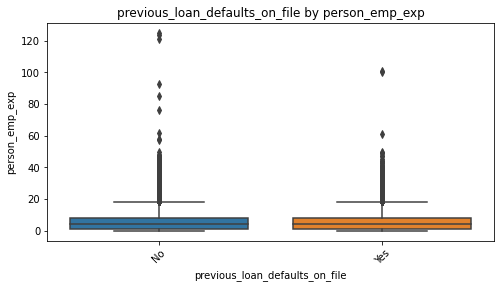

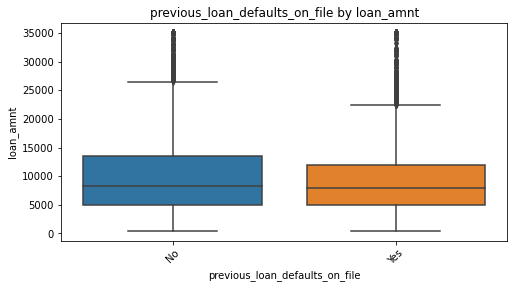

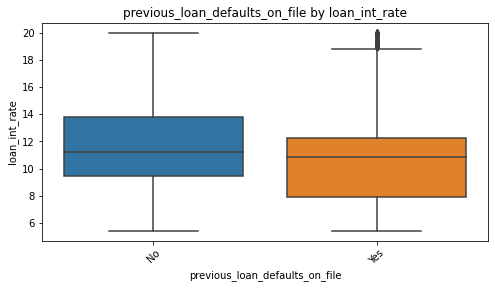

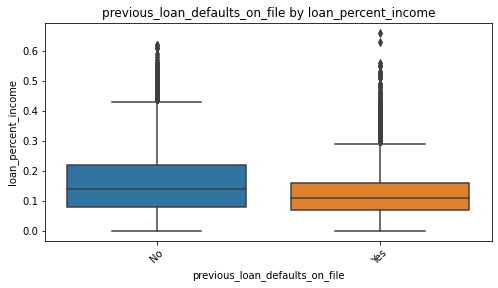

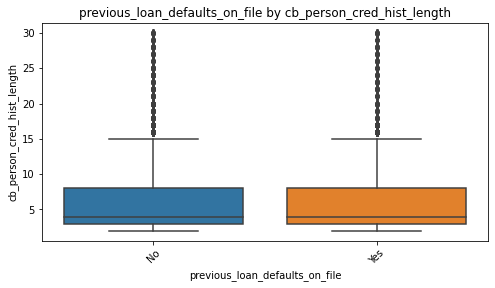

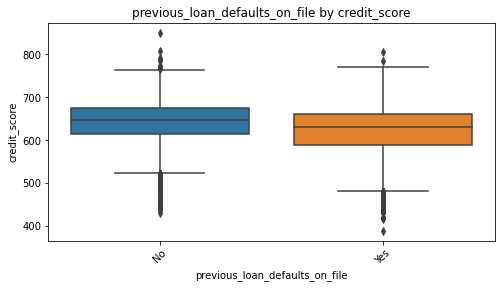

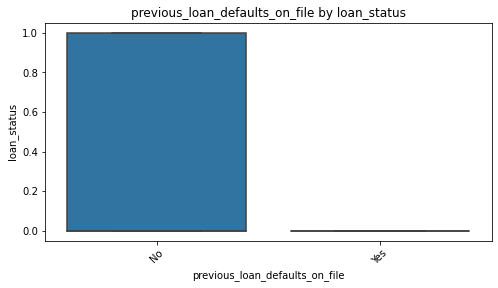

In [38]:
for i in cat_col:
    for j in num_col:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=i, y=j)
        plt.title(f'{i} by {j}')
        plt.xticks(rotation=45)
        plt.show()

**Key Observation_5:-**

**1.Gender**

1. The number of males aged 80 and above is higher than that of females.
2. Female has the highest income among the applicants.
3. Female has the highest loan percent income among the applicants.
4. Females have the highest credit scores, while males have the lowest.

**2.Person_education**

1. Individuals aged 100 and above hold either a Bachelor's, Associate's, or High School degree.
2. The top three highest-income earners hold either an Associate's, Bachelor's, or High School degree.
3. Individuals with a Bachelor's degree have the highest employment experience.
4. The person with the highest credit score holds an Associate's degree, while the person with the lowest credit score holds a High School degree.

**3.Person_home_ownership**

1. The person with the highest income has mortgaged their house.
2. Individuals with both the highest and lowest credit scores are from the mortgage category.
3. Individuals aged 100 and above have taken either personal, education, or venture loans."
4. The person with the highest income has a mortgaged home.

**4. Loan intent**

1. Individuals aged 100 and above applied for either personal, education, or venture loans.
2. The individual with the highest income applied for a personal loan.
3. The person with the highest credit score opted for a personal loan, while the individual with the lowest credit score chose a debt consolidation loan.

**5. Previous loan default**

1. The top two individuals with the highest incomes have no history of previous loan defaults.
2. The individual with the highest credit score has no previous loan defaults.
3. The individual with the lowest credit score has a history of previous loan defaults.
4. Applicants who defaulted on previous loans were not approved for a loan this time

2. Categorical vs Numerical using Scatter plot

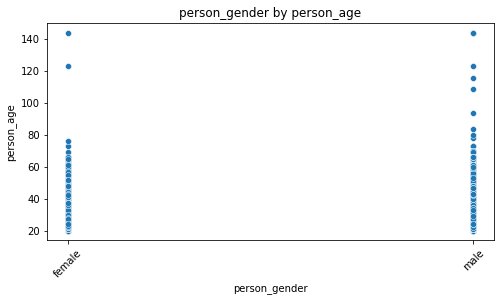

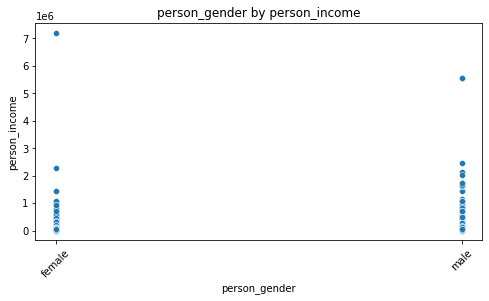

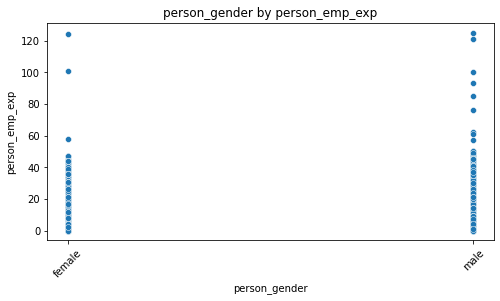

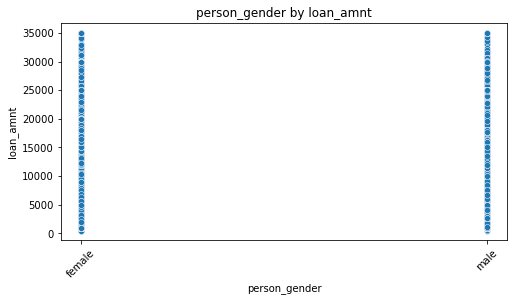

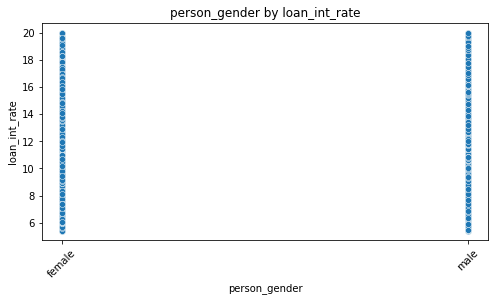

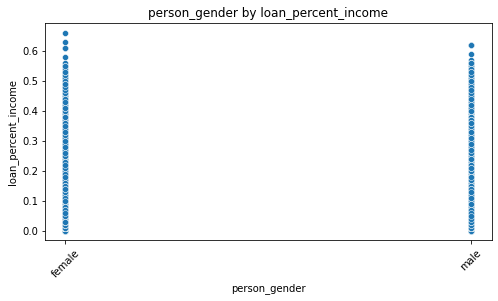

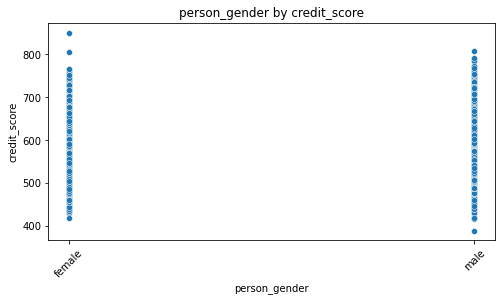

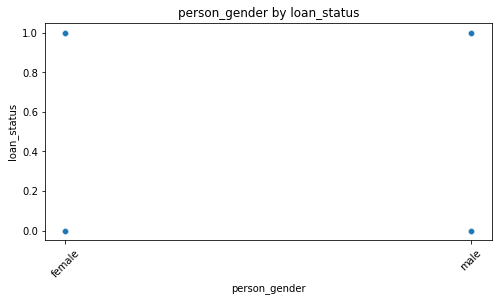

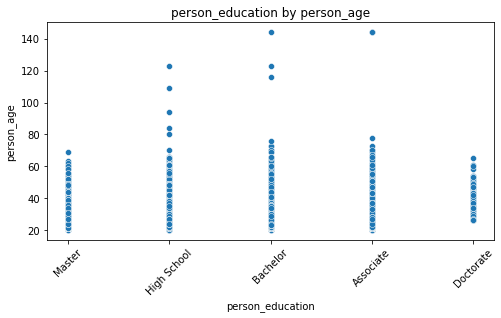

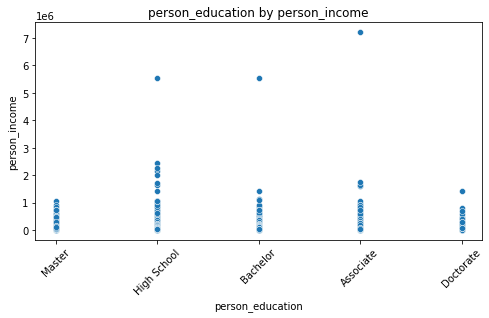

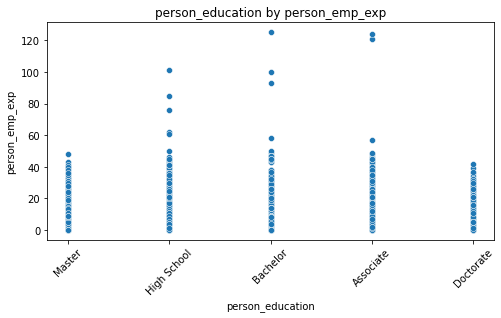

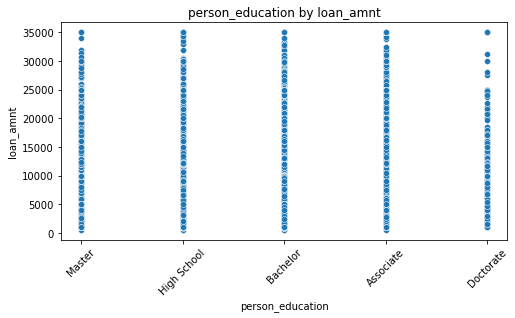

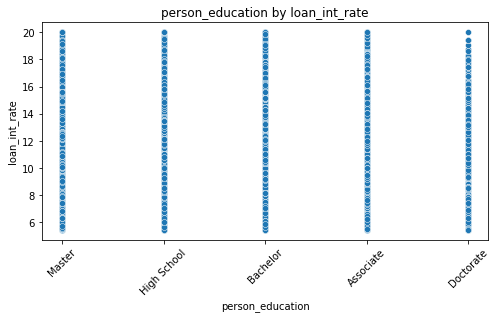

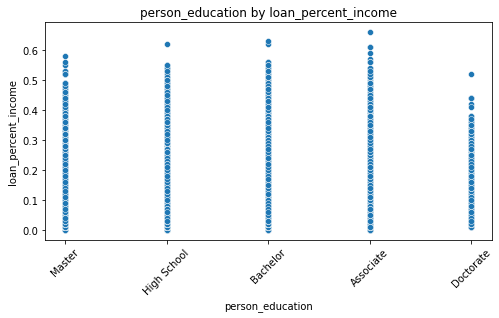

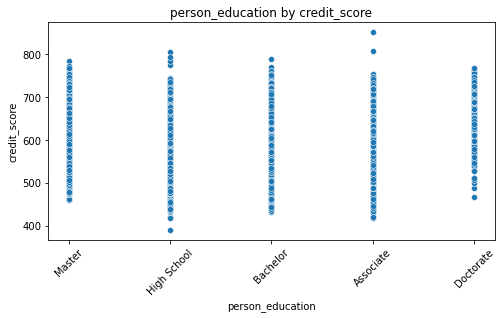

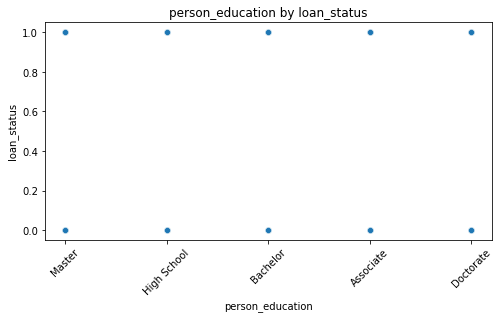

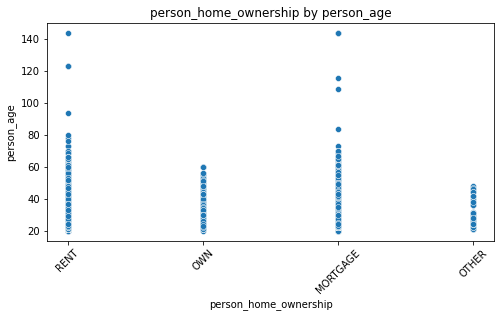

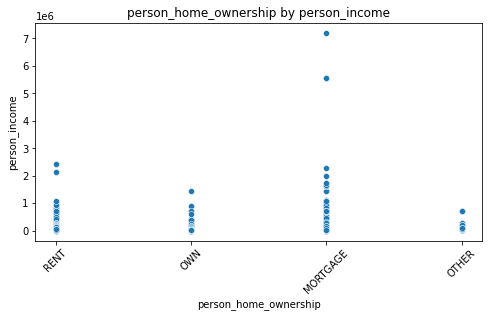

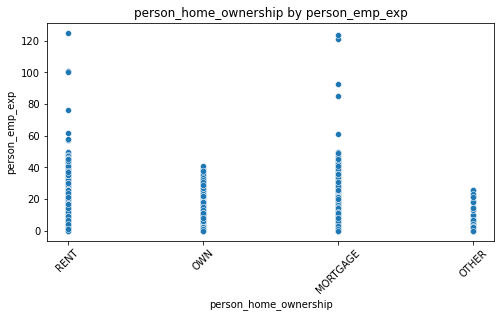

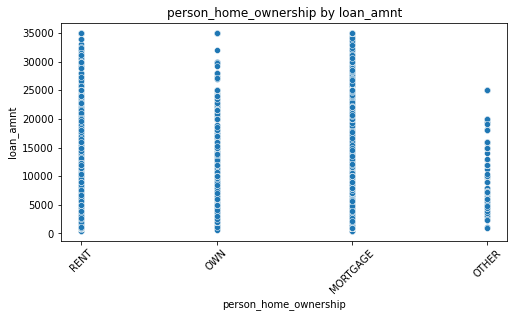

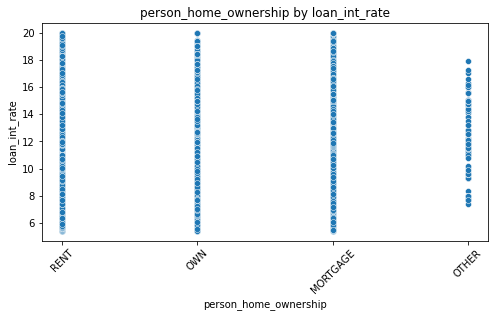

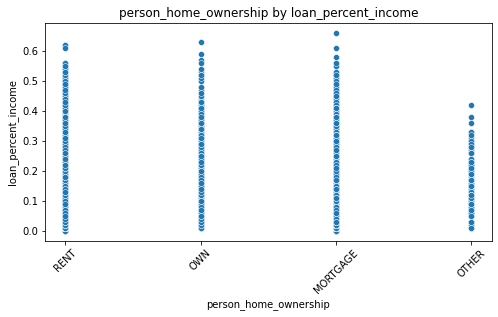

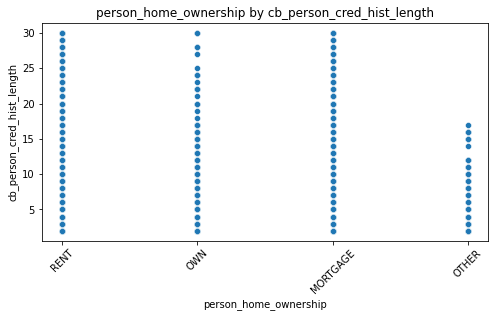

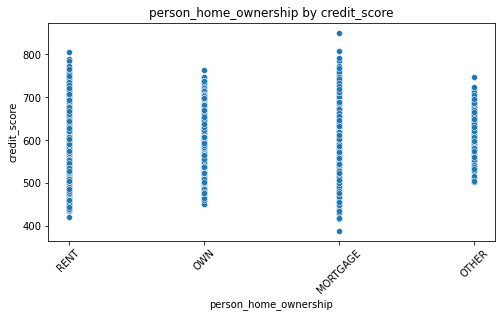

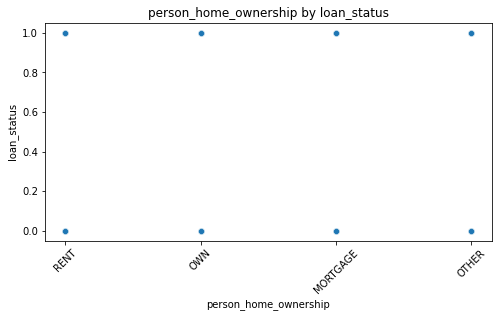

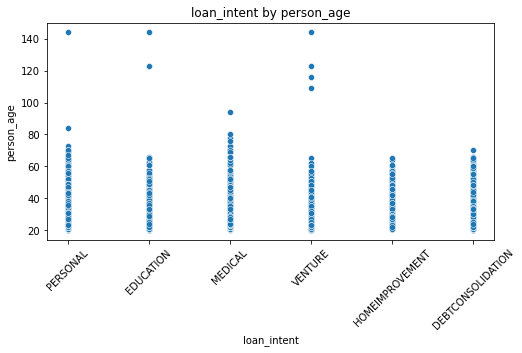

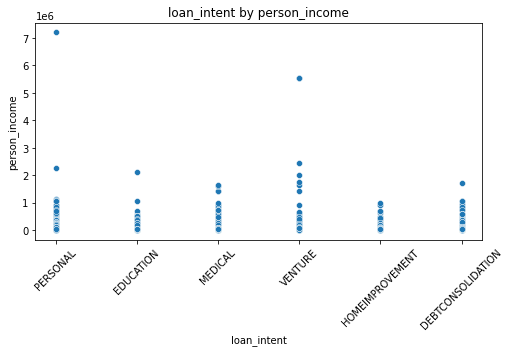

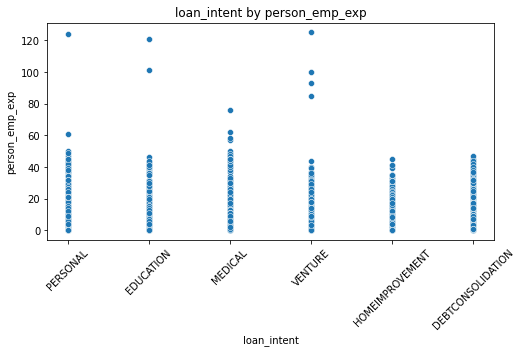

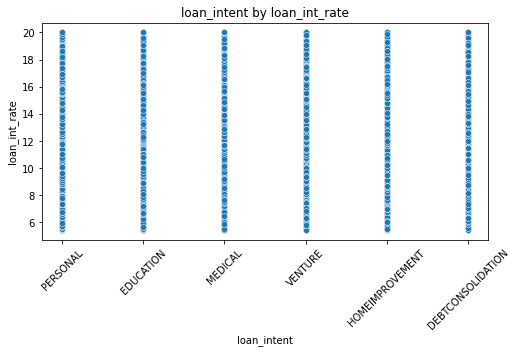

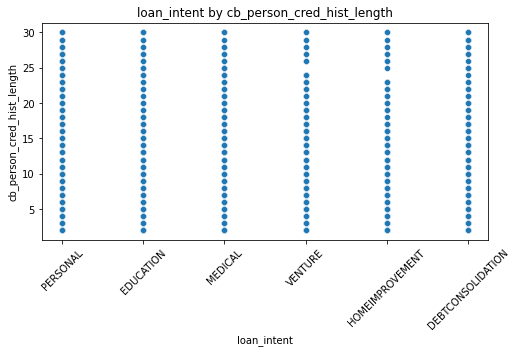

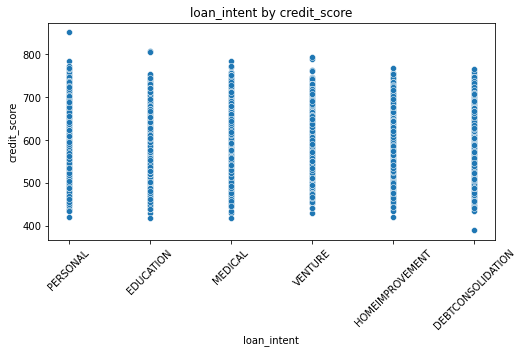

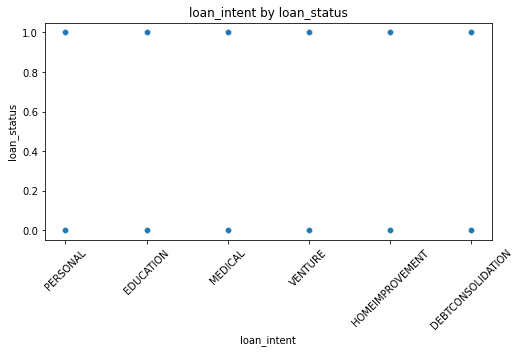

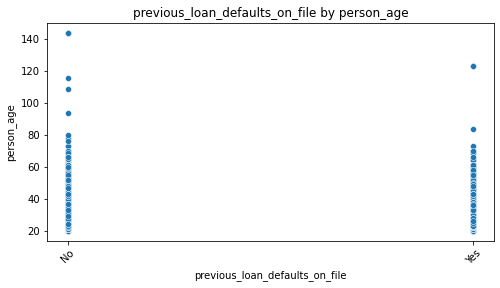

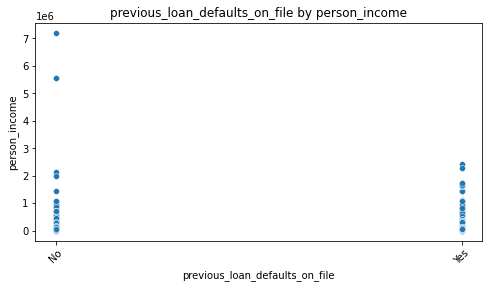

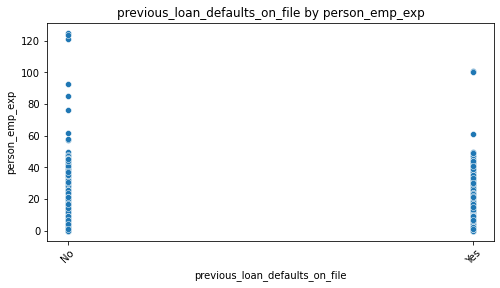

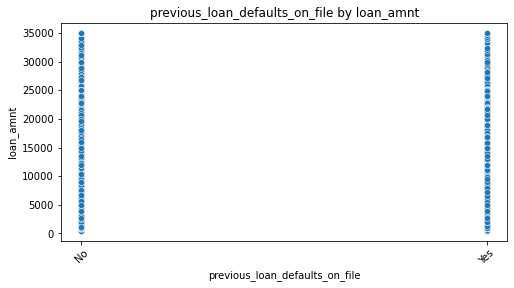

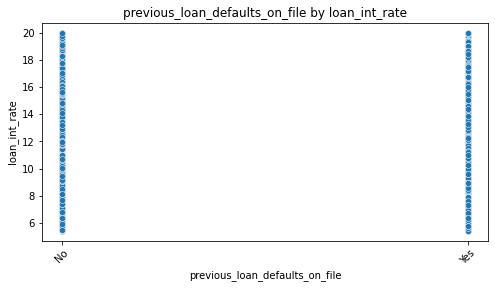

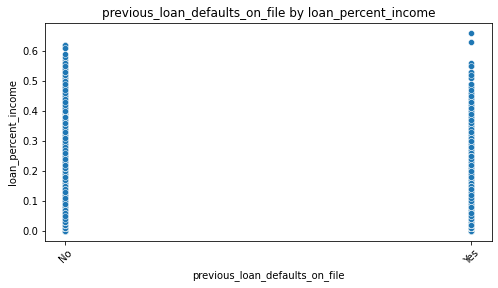

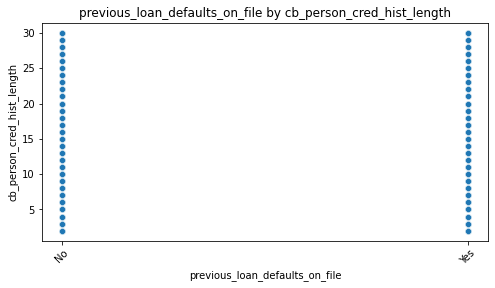

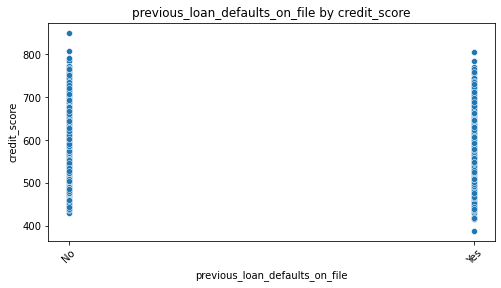

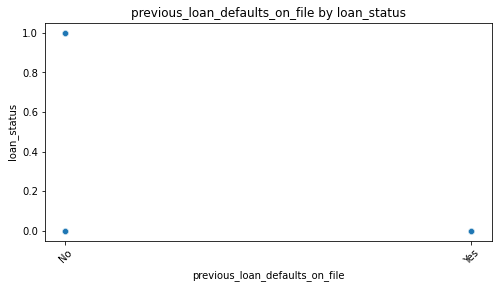

In [58]:
for i in cat_col:
    for j in num_col:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=i, y=j)
        plt.title(f'{i} by {j}')
        plt.xticks(rotation=45)
        plt.show()

**Key Observations_6:- Self explanatory**

In [53]:
for i in cat_col:
    for j in num_col:
        # Create a pivot table for the categorical and numerical columns
        pivot_table = df.pivot_table(values=j, index=i, aggfunc=['mean', 'median', 'std', 'count'])
        
        # Display the pivot table
        print(f"Pivot Table for {i} by {j}:\n")
        print(pivot_table)
        print("\n" + "="*50 + "\n")


Pivot Table for person_gender by person_age:

                    mean     median        std      count
              person_age person_age person_age person_age
person_gender                                            
female         27.646560         26   5.731260      20159
male           27.859627         26   6.286797      24841


Pivot Table for person_gender by person_income:

                       mean        median           std         count
              person_income person_income person_income person_income
person_gender                                                        
female         79410.904856         66958   77759.52192         20159
male           81056.034942         67134   82514.63011         24841


Pivot Table for person_gender by person_emp_exp:

                        mean         median            std          count
              person_emp_exp person_emp_exp person_emp_exp person_emp_exp
person_gender                                                  

Master                             3.480200                       6980  


Pivot Table for person_education by credit_score:

                         mean       median          std        count
                 credit_score credit_score credit_score credit_score
person_education                                                    
Associate          629.379365          637    49.424620        12028
Bachelor           638.447645          646    48.988915        13399
Doctorate          667.940419          675    51.147901          621
High School        618.812145          626    49.446566        11972
Master             647.485530          655    49.154122         6980


Pivot Table for person_education by loan_status:

                        mean      median         std       count
                 loan_status loan_status loan_status loan_status
person_education                                                
Associate           0.220319           0    0.414479       12028
Bachelor  

Pivot Table for loan_intent by loan_amnt:

                           mean    median          std     count
                      loan_amnt loan_amnt    loan_amnt loan_amnt
loan_intent                                                     
DEBTCONSOLIDATION   9548.333660      8000  6377.318220      7145
EDUCATION           9507.405987      8000  6248.036702      9153
HOMEIMPROVEMENT    10419.187330      9000  6661.533228      4783
MEDICAL             9137.959172      7846  6131.015135      8548
PERSONAL            9603.918432      8000  6296.466752      7552
VENTURE             9658.897429      8000  6283.219150      7819


Pivot Table for loan_intent by loan_int_rate:

                           mean        median           std         count
                  loan_int_rate loan_int_rate loan_int_rate loan_int_rate
loan_intent                                                              
DEBTCONSOLIDATION     11.036640         11.01      3.029095          7145
EDUCATION             10.90

In [60]:
num_col_1=num_col.columns.to_list()
num_col_1

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

In [61]:
cat_col_1=cat_col.columns.to_list()
cat_col_1

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

3. Numerical vs Numerical 

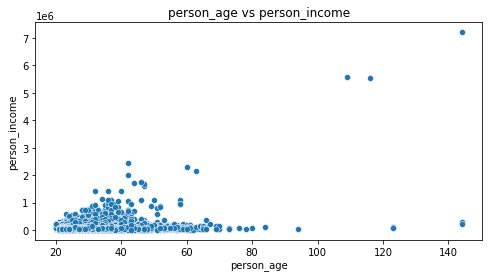

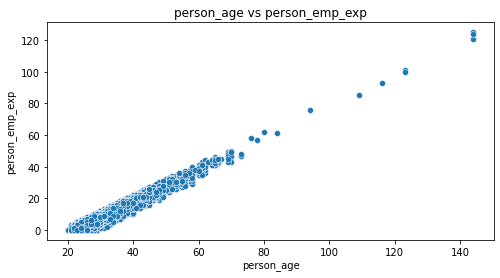

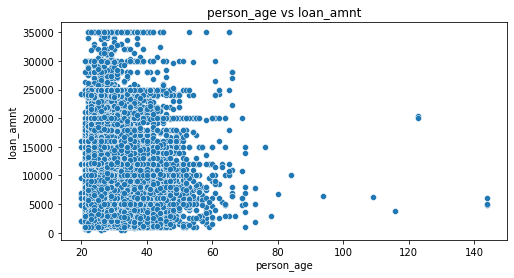

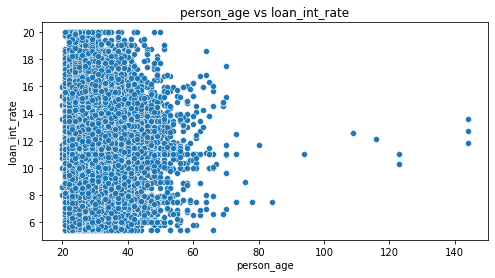

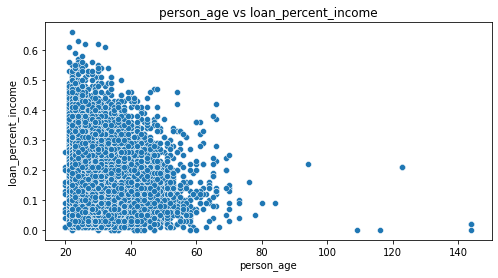

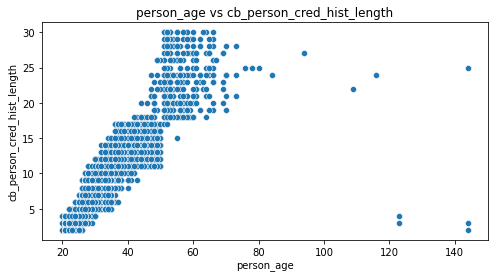

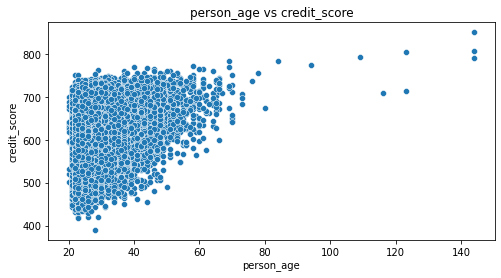

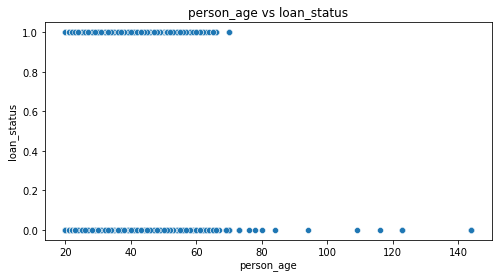

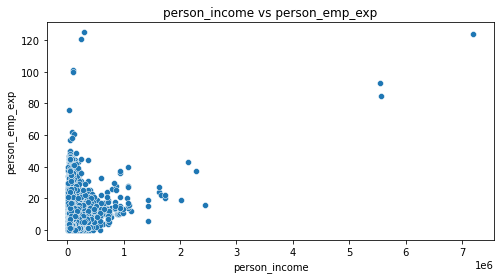

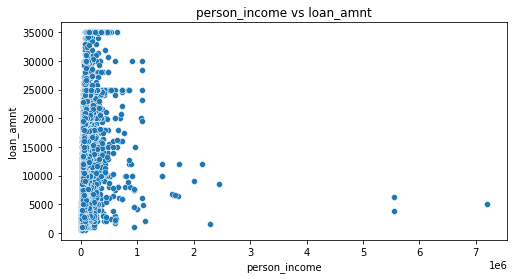

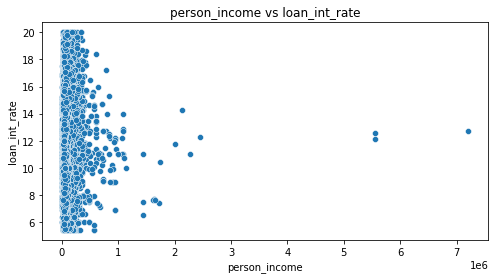

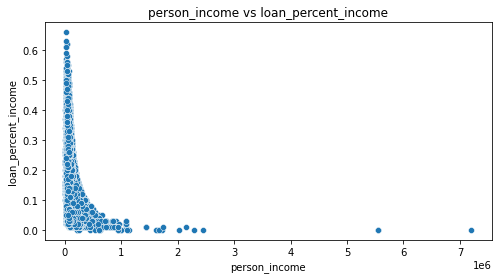

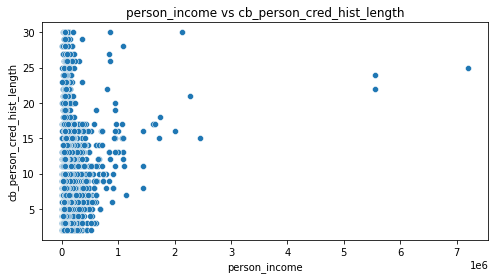

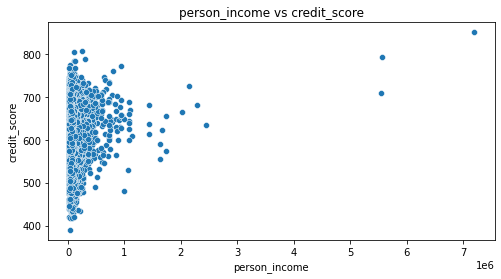

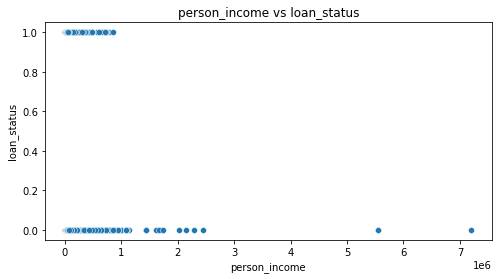

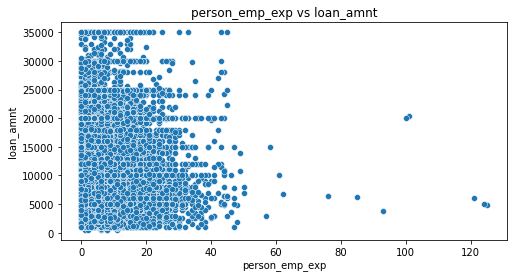

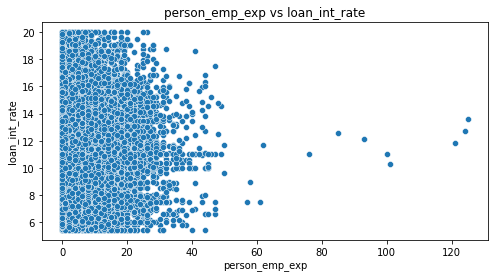

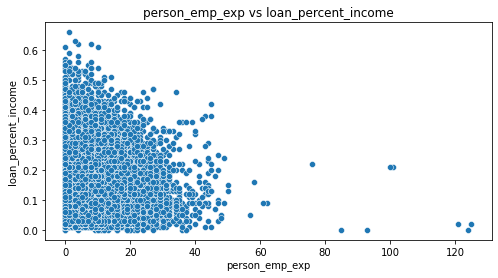

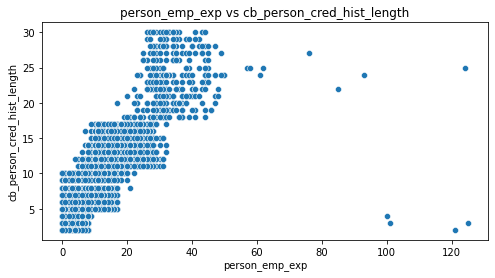

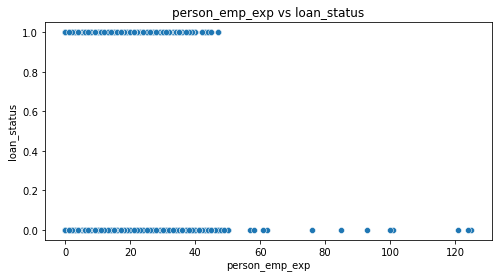

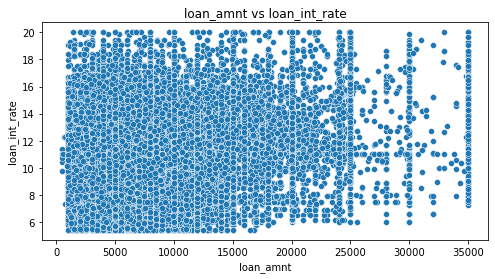

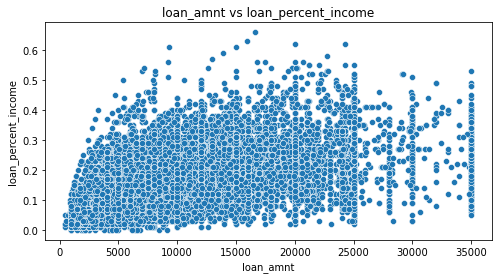

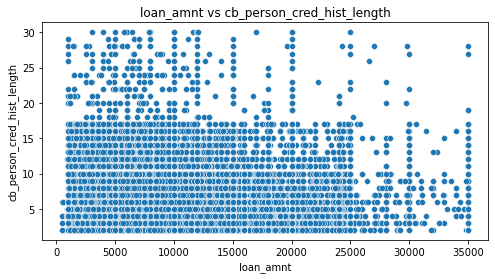

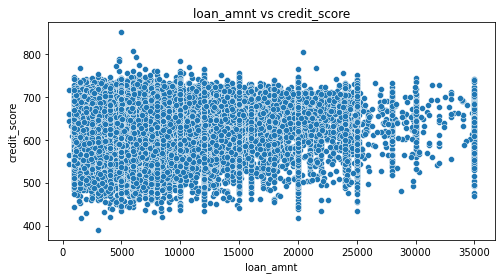

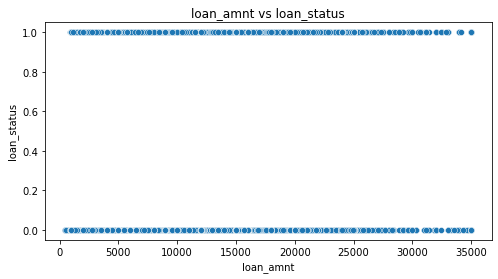

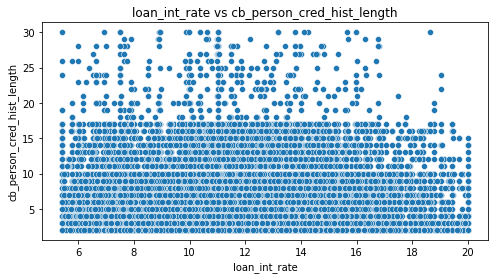

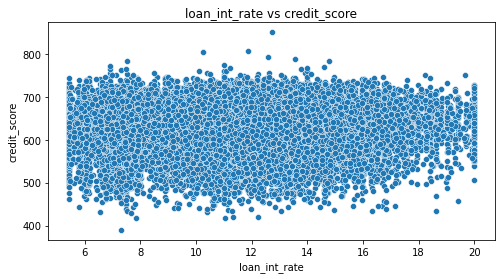

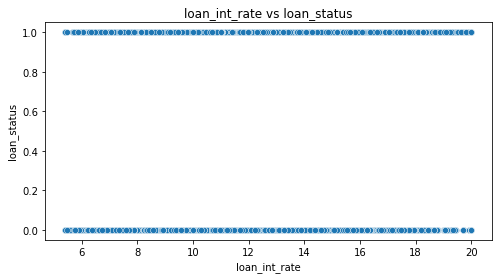

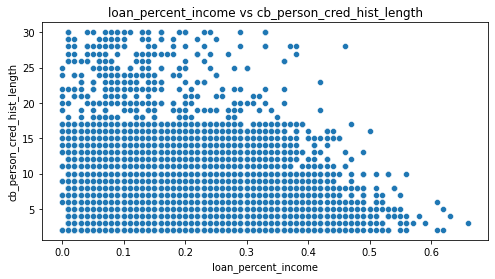

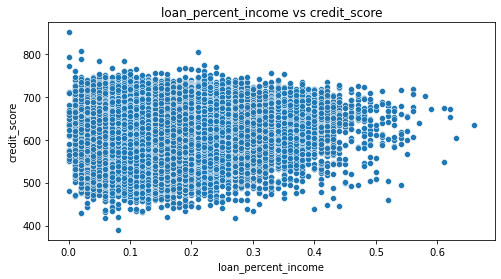

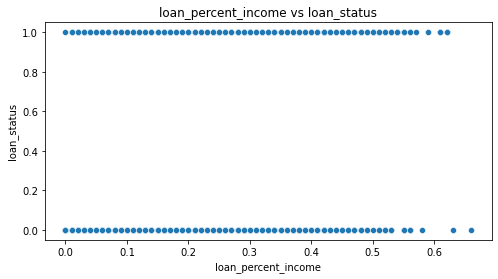

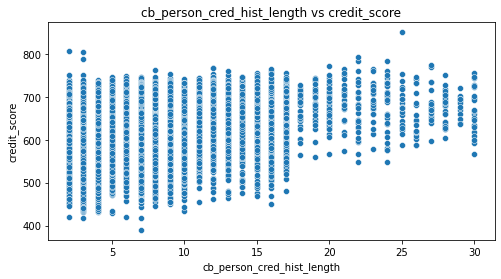

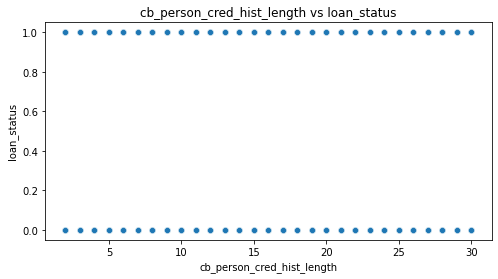

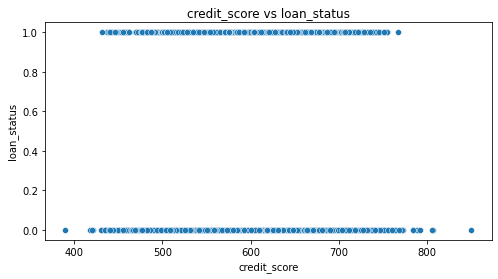

In [62]:
for i in range(len(num_col_1)):
    for j in range(i + 1, len(num_col_1)):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=num_col_1[i], y=num_col_1[j])
        plt.title(f'{num_col_1[i]} vs {num_col_1[j]}')
        plt.show()

**Key observation_7**

1. The person with the highest age has the highest income but did not receive a loan.
2. The person with the highest age also has the highest credit score.
3. Individuals aged 80 and above did not receive a loan.
4. The person with the highest income also has the highest credit score.
5. Individuals earning more than 3,000,000 did not receive a loan.

4.Categorical vs Categorical

Corelation matrix or Num features

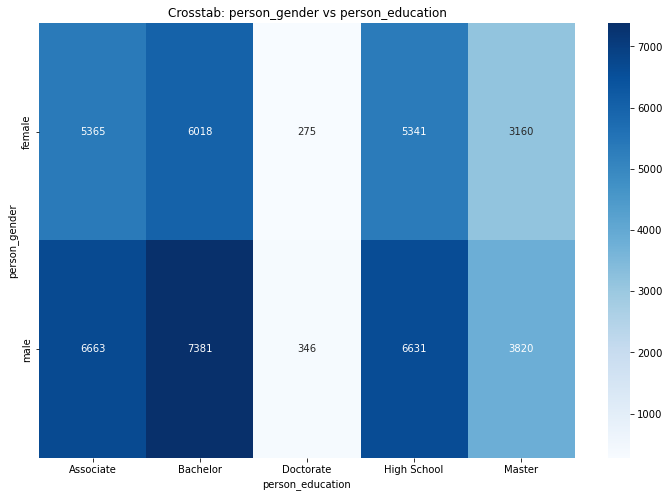

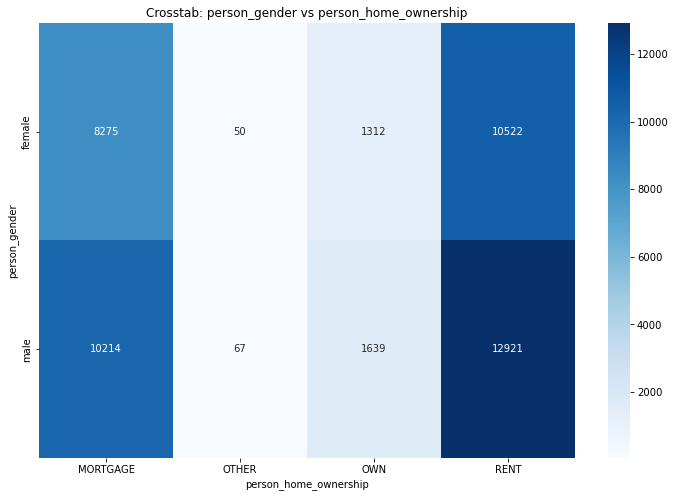

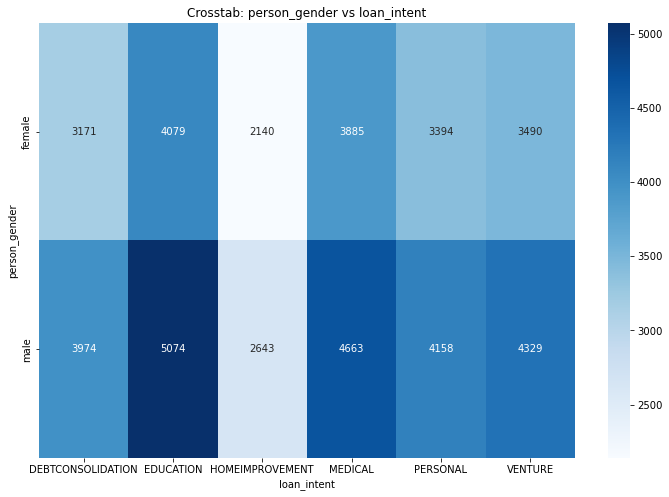

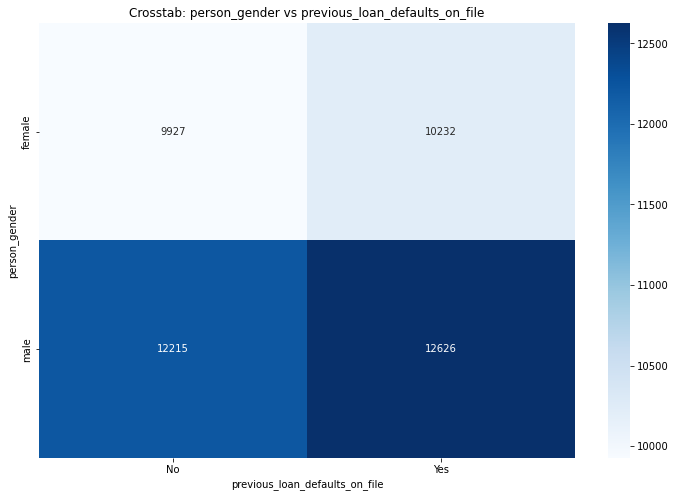

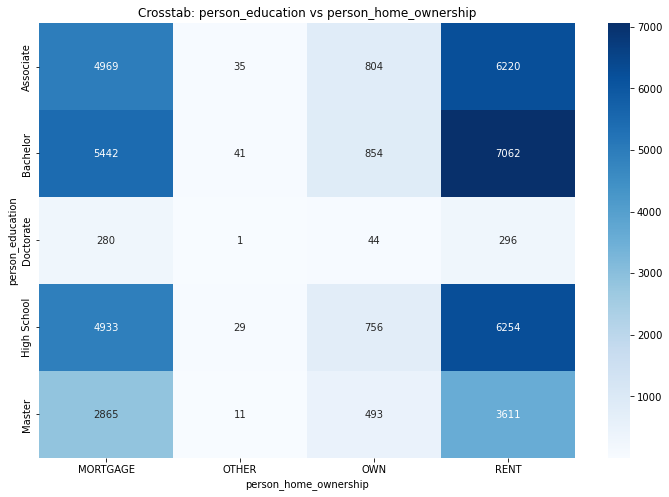

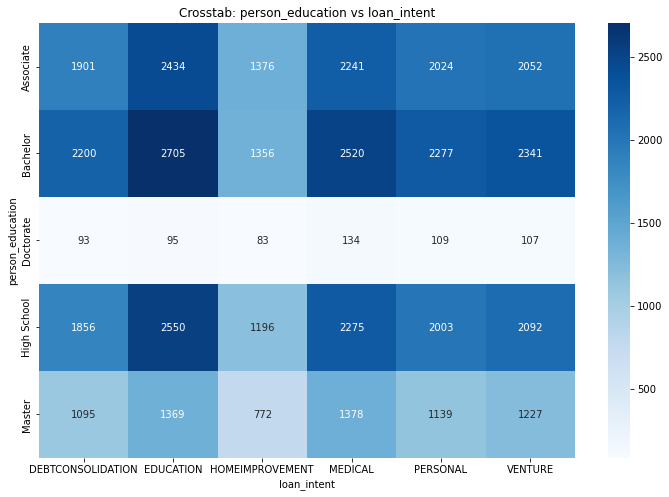

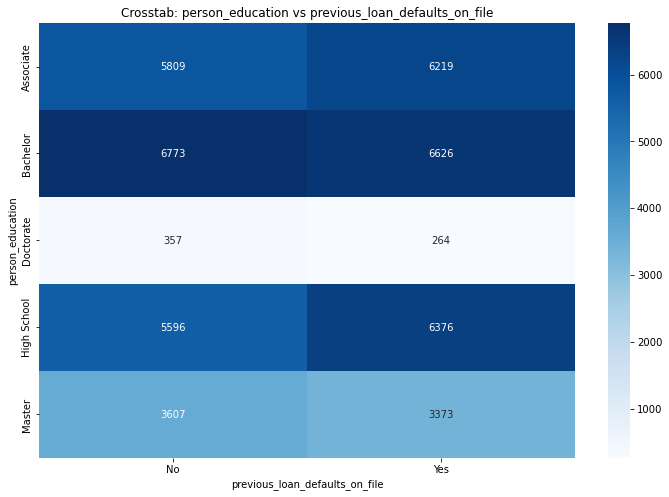

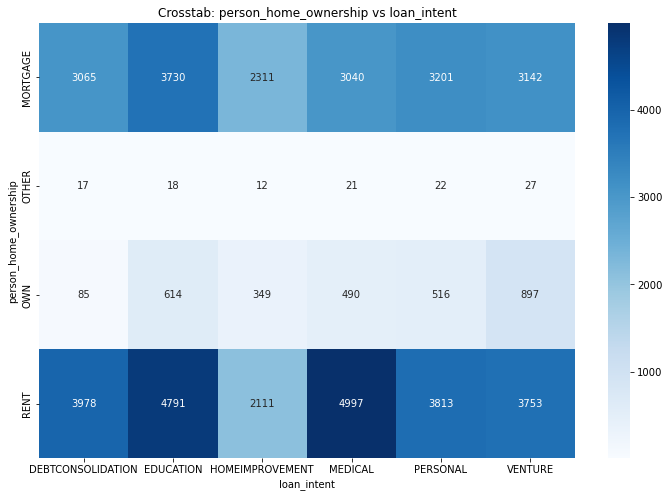

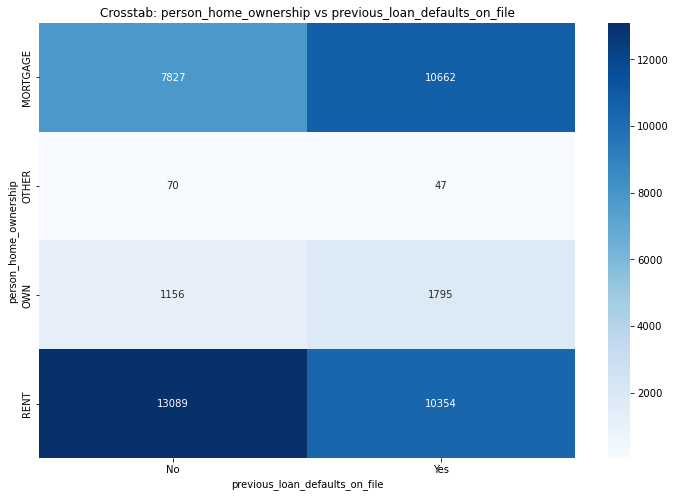

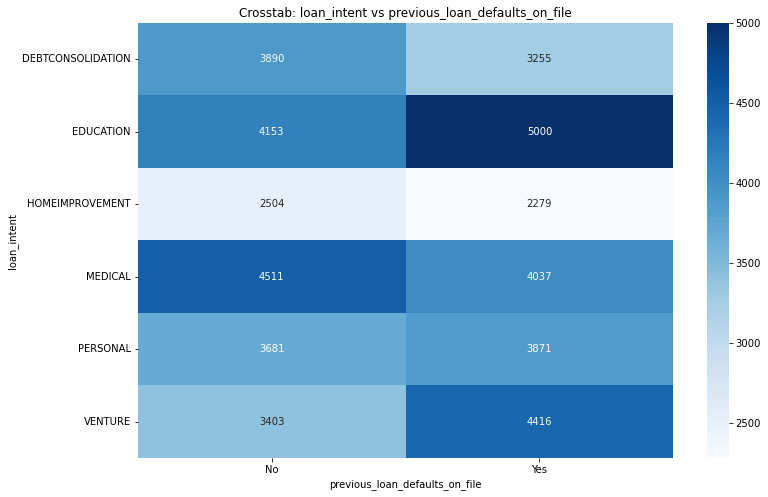

In [65]:
for i in range(len(cat_col_1)):
    for j in range(i + 1, len(cat_col_1)):
        crosstab = pd.crosstab(df[cat_col_1[i]], df[cat_col_1[j]])
        plt.figure(figsize=(12, 8))
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Crosstab: {cat_col_1[i]} vs {cat_col_1[j]}')
        plt.show()

**Key Observation_8:**-Self Explanatory

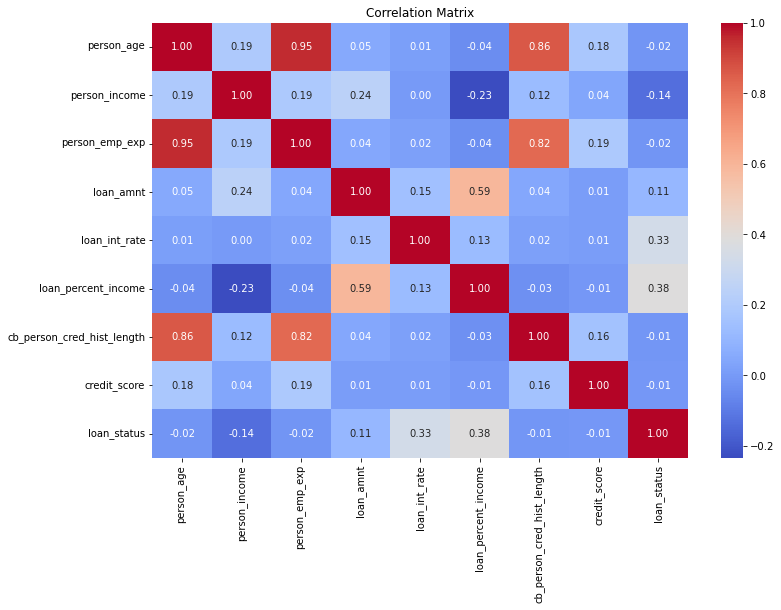

In [67]:
corr = df[num_col_1].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Key Observation_9**-
1. Person age & exp has very high corelation (0.95)
2. Person age & credit hist length has very high corelation (0.86)


In [68]:
df1=df.copy()  
df1

person_age person_gender person_education  person_income  \
0              22        female           Master          71948   
1              21        female      High School          12282   
2              25        female      High School          12438   
3              23        female         Bachelor          79753   
4              24          male           Master          66135   
...           ...           ...              ...            ...   
44995          27          male        Associate          47971   
44996          37        female        Associate          65800   
44997          33          male        Associate          56942   
44998          29          male         Bachelor          33164   
44999          24          male      High School          51609   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT      35000           PERSONAL   
1                   0                   OWN       1000          EDUCATION   
2                   3              MORTGAGE       5500            MEDICAL   
3                   0                  RENT      35000            MEDICAL   
4                   1                  RENT      35000            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT      15000            MEDICAL   
44996              17                  RENT       9000    HOMEIMPROVEMENT   
44997               7                  RENT       2771  DEBTCONSOLIDATION   
44998               4                  RENT      12000          EDUCATION   
44999               1                  RENT       6665  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                           3   
1              11.14                 0.08                           2   
2              12.87                 0.44                           3   
3              15.23                 0.44                           2   
4              14.27                 0.53                           4   
...              ...                  ...                         ...   
44995          15.66                 0.31                           3   
44996          14.07                 0.14                          11   
44997          10.02                 0.05                          10   
44998          13.23                 0.36                           6   
44999          17.05                 0.13                           3   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

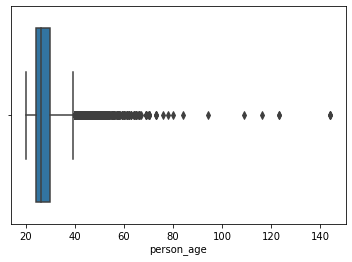

In [69]:
sns.boxplot(df['person_age'])

# Handling outliers

In [70]:
# Finding the IQR
percentile25 = df['person_age'].quantile(0.25)
percentile75 = df['person_age'].quantile(0.75)

In [71]:
iqr = percentile75 - percentile25

In [72]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [73]:
upper_limit

39.0

In [74]:
lower_limit

15.0

Considered upper limit 70 for age 

In [75]:
df1 = df1[df1['person_age'] <= 70]

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

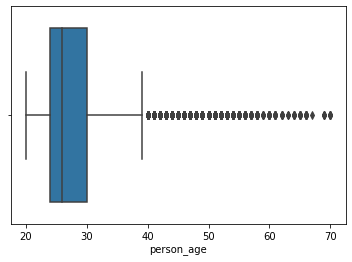

In [76]:
sns.boxplot(df1['person_age'])

In [78]:
# Finding the IQR
percentile25 = df['person_income'].quantile(0.25)
percentile75 = df['person_income'].quantile(0.75)

In [79]:
iqr = percentile75 - percentile25

In [80]:
upper_limit_1 = percentile75 + 1.5 * iqr
lower_limit_1 = percentile25 - 1.5 * iqr

In [81]:
upper_limit_1

168667.125

In [82]:
lower_limit_1

-25673.875

In [88]:
df1[df1['person_income']>1200000]  # 

person_age person_gender person_education  person_income  \
17833          32        female      High School        1440746   
29119          36          male        Doctorate        1440982   
29120          40        female         Bachelor        1440915   
30049          42          male      High School        2448661   
31922          47          male      High School        1635757   
31924          44          male      High School        1728974   
32497          63          male      High School        2139143   
32546          60        female      High School        2280980   
33132          47          male        Associate        1621992   
35850          47          male        Associate        1661567   
37175          42          male      High School        2012954   
41288          46          male        Associate        1741243   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
17833               6              MORTGAGE      12000            VENTURE   
29119              15                   OWN      10000            MEDICAL   
29120              19              MORTGAGE      10000            MEDICAL   
30049              16                  RENT       8450            VENTURE   
31922              24              MORTGAGE       6600            VENTURE   
31924              20              MORTGAGE       6400  DEBTCONSOLIDATION   
32497              43                  RENT      12025          EDUCATION   
32546              37              MORTGAGE       1500           PERSONAL   
33132              27              MORTGAGE       6835            MEDICAL   
35850              22              MORTGAGE       6545            MEDICAL   
37175              19              MORTGAGE       9121            VENTURE   
41288              22              MORTGAGE      12011            VENTURE   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
17833           7.51                 0.01                           8   
29119           6.54                 0.01                          11   
29120          11.01                 0.01                          16   
30049          12.29                 0.00                          15   
31922           7.74                 0.00                          17   
31924           7.40                 0.00                          15   
32497          14.27                 0.01                          30   
32546          11.01                 0.00                          21   
33132           7.66                 0.00                          17   
35850           7.65                 0.00                          17   
37175          11.74                 0.00                          16   
41288          10.42                 0.01                          18   

       credit_score previous_loan_defaults_on_file  loan_status  
17833           613                             No            0  
29119           682                            Yes            0  
29120           637                            Yes            0  
30049           635                            Yes            0  
31922           591                            Yes            0  
31924           573                            Yes            0  
32497           724                             No            0  
32546           682                            Yes            0  
33132           555                            Yes            0  
35850           622                            Yes            0  
37175           664                             No            0  
41288           655                            Yes            0

In [89]:
df1 = df1[df1['person_income'] <=1200000] # Considering 1200000 is upper limit

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


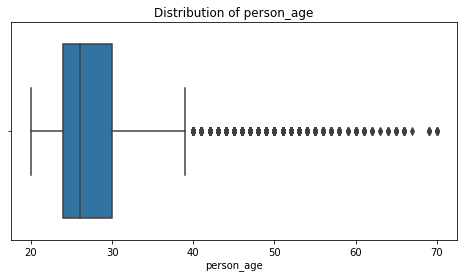

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


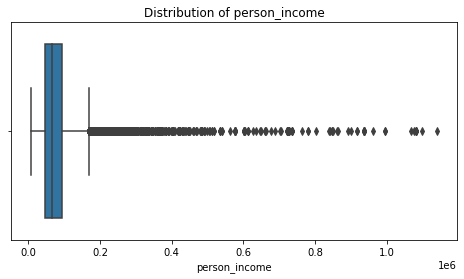

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


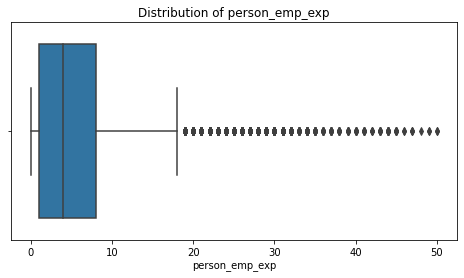

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


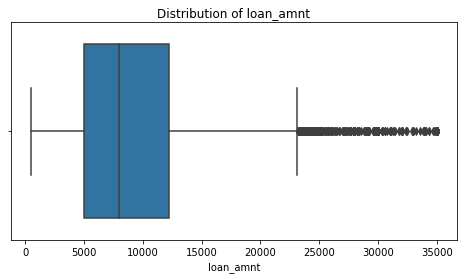

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


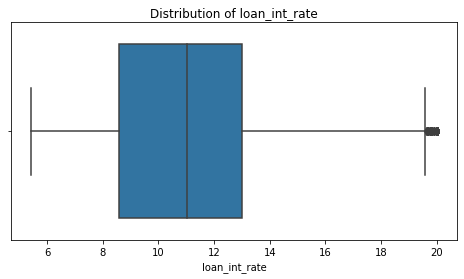

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


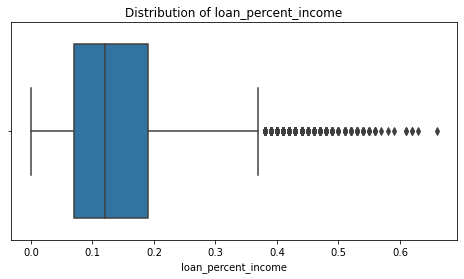

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


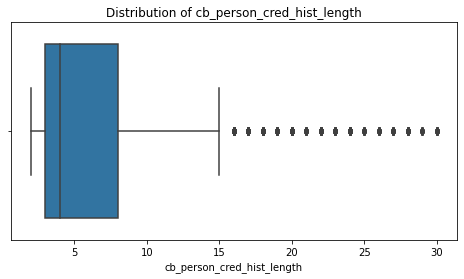

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


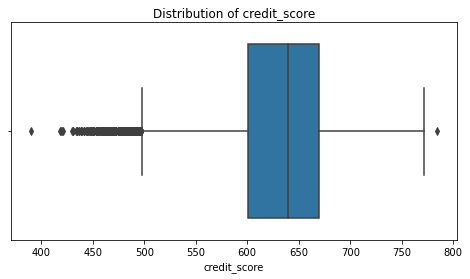

C:\Users\mohit\anaconda3a\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


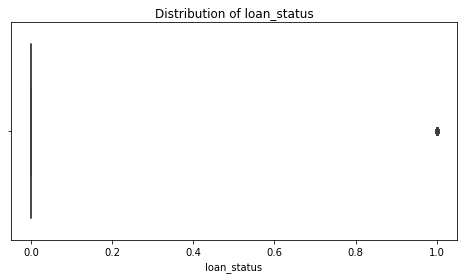

In [92]:
# Univariate analysis for numerical columns
for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df1[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()


In [93]:
df1

person_age person_gender person_education  person_income  \
0              22        female           Master          71948   
1              21        female      High School          12282   
2              25        female      High School          12438   
3              23        female         Bachelor          79753   
4              24          male           Master          66135   
...           ...           ...              ...            ...   
44995          27          male        Associate          47971   
44996          37        female        Associate          65800   
44997          33          male        Associate          56942   
44998          29          male         Bachelor          33164   
44999          24          male      High School          51609   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT      35000           PERSONAL   
1                   0                   OWN       1000          EDUCATION   
2                   3              MORTGAGE       5500            MEDICAL   
3                   0                  RENT      35000            MEDICAL   
4                   1                  RENT      35000            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT      15000            MEDICAL   
44996              17                  RENT       9000    HOMEIMPROVEMENT   
44997               7                  RENT       2771  DEBTCONSOLIDATION   
44998               4                  RENT      12000          EDUCATION   
44999               1                  RENT       6665  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                           3   
1              11.14                 0.08                           2   
2              12.87                 0.44                           3   
3              15.23                 0.44                           2   
4              14.27                 0.53                           4   
...              ...                  ...                         ...   
44995          15.66                 0.31                           3   
44996          14.07                 0.14                          11   
44997          10.02                 0.05                          10   
44998          13.23                 0.36                           6   
44999          17.05                 0.13                           3   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[44973 rows x 14 columns]

# Splitting data into X & y

In [94]:
X=df.drop(columns='loan_status')
y=df['loan_status']

In [95]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=43) # Splitting data into train & test

In [97]:
X_train.head()

person_age person_gender person_education  person_income  \
16888          23          male        Associate          56268   
26234          33        female        Associate         119465   
14962          22          male      High School         145016   
17503          25          male      High School          34368   
32005          38        female      High School         241072   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
16888               3                  RENT      12800    PERSONAL   
26234              12              MORTGAGE      24000     MEDICAL   
14962               0              MORTGAGE      22000     MEDICAL   
17503               1                   OWN      14125   EDUCATION   
32005              19              MORTGAGE      20000     MEDICAL   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
16888          19.41                 0.23                           2   
26234          11.36                 0.20                           7   
14962           7.49                 0.15                           3   
17503           6.99                 0.41                           2   
32005          11.48                 0.08                          11   

       credit_score previous_loan_defaults_on_file  
16888           602                             No  
26234           653                            Yes  
14962           572                            Yes  
17503           536                             No  
32005           487                            Yes

As Person_age, Person_income, person_emp_exp, loan_amount,and loan_percent_income are all right skew.so converting them into nearby nomal distribution

In [98]:
X_train['age_new'] = np.log(df['person_age'] + 0.01)  # Adding 1 to avoid log(0)
X_train['person_income_new'] = np.log(df['person_income'] + 0.01)  # Adding 1 to avoid log(0)
X_train['exp_new'] = np.log(df['person_emp_exp'] + 0.01)  # Adding 1 to avoid log(0)
X_train['laon_amt_new'] = np.log(df['loan_amnt'] + 0.01)
X_train['laon_per_new'] = np.log(df['loan_percent_income'] + 0.01)

In [99]:
X_train.head()

person_age person_gender person_education  person_income  \
16888          23          male        Associate          56268   
26234          33        female        Associate         119465   
14962          22          male      High School         145016   
17503          25          male      High School          34368   
32005          38        female      High School         241072   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
16888               3                  RENT      12800    PERSONAL   
26234              12              MORTGAGE      24000     MEDICAL   
14962               0              MORTGAGE      22000     MEDICAL   
17503               1                   OWN      14125   EDUCATION   
32005              19              MORTGAGE      20000     MEDICAL   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
16888          19.41                 0.23                           2   
26234          11.36                 0.20                           7   
14962           7.49                 0.15                           3   
17503           6.99                 0.41                           2   
32005          11.48                 0.08                          11   

       credit_score previous_loan_defaults_on_file   age_new  \
16888           602                             No  3.135929   
26234           653                            Yes  3.496811   
14962           572                            Yes  3.091497   
17503           536                             No  3.219276   
32005           487                            Yes  3.637849   

       person_income_new   exp_new  laon_amt_new  laon_per_new  
16888          10.937881  1.101940      9.457201     -1.427116  
26234          11.690779  2.485740     10.085810     -1.560648  
14962          11.884599 -4.605170      9.998798     -1.832581  
17503          10.444881  0.009950      9.555702     -0.867501  
32005          12.392851  2.944965      9.903488     -2.407946

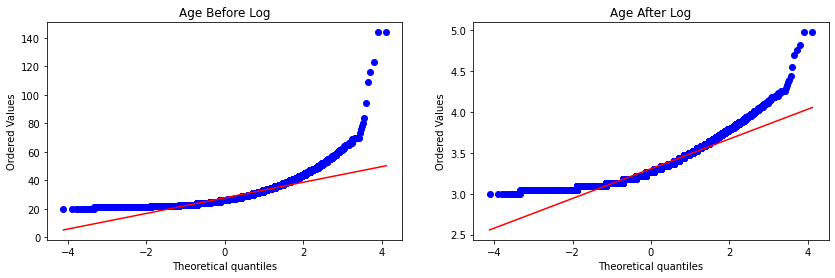

In [100]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['person_age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train['age_new'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [101]:
X_train['person_age'].skew()

2.4607418991773025

In [102]:
X_train['age_new'].skew()

1.1970132074279902

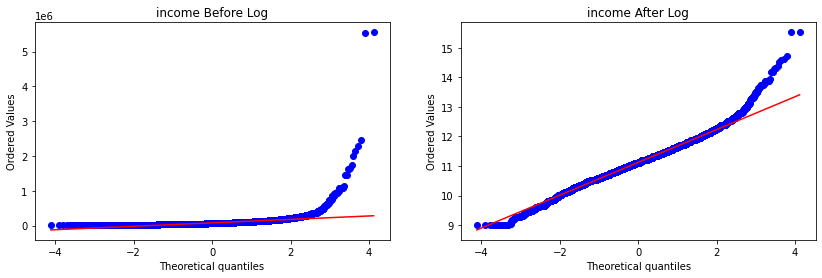

In [103]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['person_income'], dist="norm", plot=plt)
plt.title('income Before Log')

plt.subplot(122)
stats.probplot(X_train['person_income_new'], dist="norm", plot=plt)
plt.title('income After Log')

plt.show()

In [104]:
X_train['person_income'].skew()

26.612178656883675

In [105]:
X_train['person_income_new'].skew()

0.21050758697387603

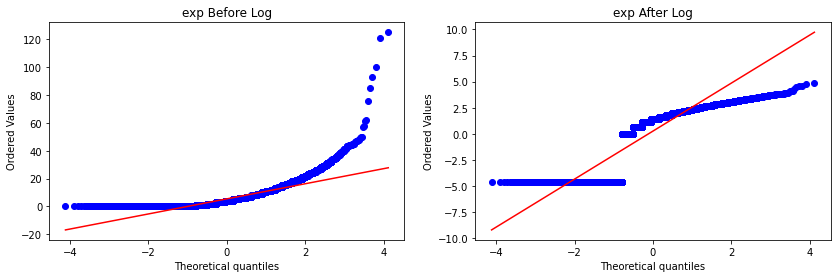

In [106]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['person_emp_exp'], dist="norm", plot=plt)
plt.title('exp Before Log')

plt.subplot(122)
stats.probplot(X_train['exp_new'], dist="norm", plot=plt)
plt.title('exp After Log')

plt.show()

In [107]:
X_train['person_emp_exp'].skew()

2.5082432736510634

In [108]:
X_train['exp_new'].skew()

-1.105422784175146

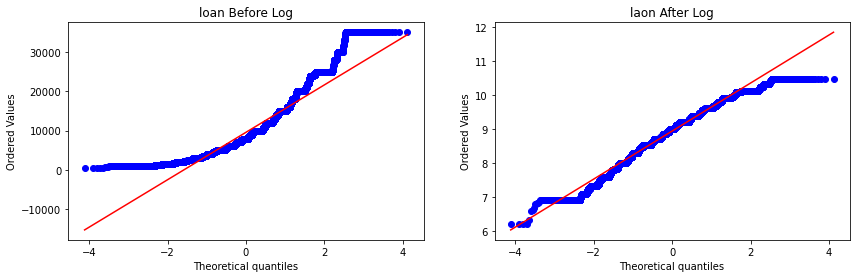

In [109]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['loan_amnt'], dist="norm", plot=plt)
plt.title('loan Before Log')

plt.subplot(122)
stats.probplot(X_train['laon_amt_new'], dist="norm", plot=plt)
plt.title('laon After Log')

plt.show()

In [110]:
X_train['loan_amnt'].skew()

1.1940634507104615

In [111]:
X_train['laon_amt_new'].skew()

-0.4361175114377548

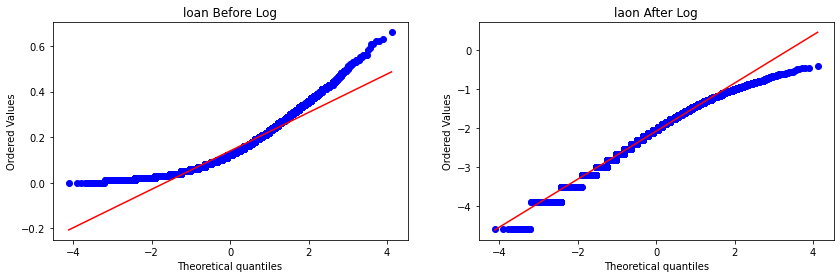

In [112]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['loan_percent_income'], dist="norm", plot=plt)
plt.title('loan Before Log')

plt.subplot(122)
stats.probplot(X_train['laon_per_new'], dist="norm", plot=plt)
plt.title('laon After Log')

plt.show()

In [113]:
X_train['loan_percent_income'].skew()

1.041047923248509

In [114]:
X_train['laon_per_new'].skew()

-0.3914376417731791

As per above graph we saw that most of teh columns which are right skewed were transformed into near normal

In [116]:
X_train2=X_train.copy()
X_train2.head()

person_age person_gender person_education  person_income  \
16888          23          male        Associate          56268   
26234          33        female        Associate         119465   
14962          22          male      High School         145016   
17503          25          male      High School          34368   
32005          38        female      High School         241072   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
16888               3                  RENT      12800    PERSONAL   
26234              12              MORTGAGE      24000     MEDICAL   
14962               0              MORTGAGE      22000     MEDICAL   
17503               1                   OWN      14125   EDUCATION   
32005              19              MORTGAGE      20000     MEDICAL   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
16888          19.41                 0.23                           2   
26234          11.36                 0.20                           7   
14962           7.49                 0.15                           3   
17503           6.99                 0.41                           2   
32005          11.48                 0.08                          11   

       credit_score previous_loan_defaults_on_file   age_new  \
16888           602                             No  3.135929   
26234           653                            Yes  3.496811   
14962           572                            Yes  3.091497   
17503           536                             No  3.219276   
32005           487                            Yes  3.637849   

       person_income_new   exp_new  laon_amt_new  laon_per_new  
16888          10.937881  1.101940      9.457201     -1.427116  
26234          11.690779  2.485740     10.085810     -1.560648  
14962          11.884599 -4.605170      9.998798     -1.832581  
17503          10.444881  0.009950      9.555702     -0.867501  
32005          12.392851  2.944965      9.903488     -2.407946

In [117]:
# Dropping Below mentioned columns as transformed data has already incorporated

X_train2=X_train2.drop(['person_age','person_income','person_emp_exp','loan_amnt','loan_percent_income'], axis=1)  

In [118]:
X_train2.head()

person_gender person_education person_home_ownership loan_intent  \
16888          male        Associate                  RENT    PERSONAL   
26234        female        Associate              MORTGAGE     MEDICAL   
14962          male      High School              MORTGAGE     MEDICAL   
17503          male      High School                   OWN   EDUCATION   
32005        female      High School              MORTGAGE     MEDICAL   

       loan_int_rate  cb_person_cred_hist_length  credit_score  \
16888          19.41                           2           602   
26234          11.36                           7           653   
14962           7.49                           3           572   
17503           6.99                           2           536   
32005          11.48                          11           487   

      previous_loan_defaults_on_file   age_new  person_income_new   exp_new  \
16888                             No  3.135929          10.937881  1.101940   
26234                            Yes  3.496811          11.690779  2.485740   
14962                            Yes  3.091497          11.884599 -4.605170   
17503                             No  3.219276          10.444881  0.009950   
32005                            Yes  3.637849          12.392851  2.944965   

       laon_amt_new  laon_per_new  
16888      9.457201     -1.427116  
26234     10.085810     -1.560648  
14962      9.998798     -1.832581  
17503      9.555702     -0.867501  
32005      9.903488     -2.407946

Application of Ordinal Encoder, one hot encoder & Standard Scalar to be done through column transformer.

1. Ordinal encoding is done when some order is present in feature
2. One hot encoder is done to convert categorical feature into numercial faeture
3. Scaling of numeriacl columns is done

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
transformer2 = ColumnTransformer(transformers=[
    ('tnf4',OrdinalEncoder(categories=[['Associate', 'High School','Bachelor','Master', 'Doctorate']]),['person_education']),
    ('tnf5',OneHotEncoder(sparse=False,drop='first'),['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']),
    ('tnf6',StandardScaler(),['age_new','person_income_new','exp_new','laon_amt_new','loan_int_rate','laon_per_new','cb_person_cred_hist_length','credit_score'])
],remainder='passthrough')

In [123]:
X_test['age_new'] = np.log(df['person_age'] + 0.01)  # Adding 1 to avoid log(0)
X_test['person_income_new'] = np.log(df['person_income'] + 0.01)  # Adding 1 to avoid log(0)
X_test['exp_new'] = np.log(df['person_emp_exp'] + 0.01)  # Adding 1 to avoid log(0)
X_test['laon_amt_new'] = np.log(df['loan_amnt'] + 0.01)
X_test['laon_per_new'] = np.log(df['loan_percent_income'] + 0.01)

In [124]:
# Dropping Below mentioned columns as transformed data has already incorporated

X_test2=X_test.drop(['person_age','person_income','person_emp_exp','loan_amnt','loan_percent_income'], axis=1)

In [127]:
X_test2.head()

person_gender person_education person_home_ownership      loan_intent  \
14265          male        Associate              MORTGAGE          MEDICAL   
5337           male         Bachelor              MORTGAGE  HOMEIMPROVEMENT   
9287           male           Master                  RENT         PERSONAL   
12571        female        Associate              MORTGAGE          VENTURE   
29628          male         Bachelor                  RENT        EDUCATION   

       loan_int_rate  cb_person_cred_hist_length  credit_score  \
14265           7.74                           3           596   
5337            5.99                           4           687   
9287           11.99                           2           694   
12571          14.54                           4           587   
29628          11.99                          14           651   

      previous_loan_defaults_on_file   age_new  person_income_new  exp_new  \
14265                            Yes  3.091497          11.732719 -4.60517   
5337                              No  3.091497          10.772980 -4.60517   
9287                             Yes  3.091497          10.384060 -4.60517   
12571                            Yes  3.135929          11.522906 -4.60517   
29628                             No  3.850360          11.055483  3.17847   

       laon_amt_new  laon_per_new  
14265      8.987198     -2.659260  
5337       8.612505     -2.040221  
9287       8.517195     -1.832581  
12571      9.903488     -1.560648  
29628      9.392663     -1.609438

In [128]:
#Applying Column transformer fucntion

X_train_new2=transformer2.fit_transform(X_train2)  

In [129]:
X_train_new2

array([[ 0.        ,  1.        ,  0.        , ...,  1.04506654,
        -0.99734297, -0.60789624],
       [ 0.        ,  0.        ,  0.        , ...,  0.83032435,
         0.28809527,  0.4023113 ],
       [ 1.        ,  1.        ,  0.        , ...,  0.39300667,
        -0.74025532, -1.20213598],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.72169703,
        -0.48316767, -0.01365651],
       [ 4.        ,  1.        ,  0.        , ..., -1.4775463 ,
         0.54518292,  0.48154327],
       [ 1.        ,  1.        ,  0.        , ..., -0.06963717,
        -0.48316767, -0.2513524 ]])

In [130]:
X_test_new2=transformer2.transform(X_test2)   # tranforming X_test data

In [131]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report, confusion_matrix, roc_auc_score

# Assessing Result with multiple ML models 

LogisticRegression
----------


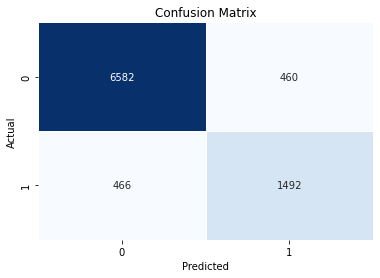

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7042
           1       0.76      0.76      0.76      1958

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000

Decision Tree Classifier
----------


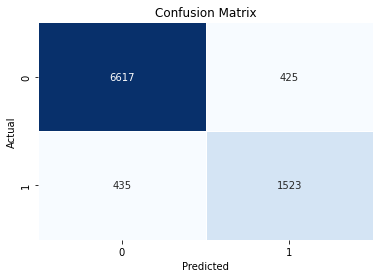

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7042
           1       0.78      0.78      0.78      1958

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



C:\Users\mohit\anaconda3a\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors
----------


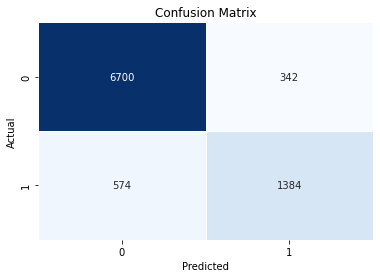

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7042
           1       0.80      0.71      0.75      1958

    accuracy                           0.90      9000
   macro avg       0.86      0.83      0.84      9000
weighted avg       0.90      0.90      0.90      9000

Random Forest
----------


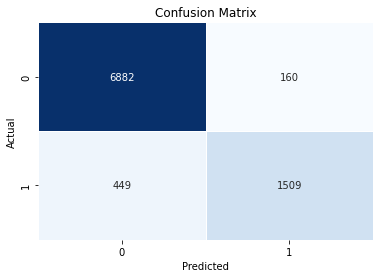

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7042
           1       0.90      0.77      0.83      1958

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

GB
----------


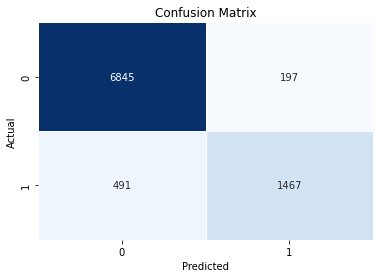

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7042
           1       0.88      0.75      0.81      1958

    accuracy                           0.92      9000
   macro avg       0.91      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



Model Accuracy Score Precision  Recall F1 Score ROC-AUC
0        LogisticRegression         89.71%    76.43%   76.2%   76.32%  95.57%
1  Decision Tree Classifier         90.44%    78.18%  77.78%   77.98%  85.87%
2       K-Nearest Neighbors         89.82%    80.19%  70.68%   75.14%  92.59%
3             Random Forest         93.23%    90.41%  77.07%   83.21%   97.6%
4                        GB         92.36%    88.16%  74.92%    81.0%  97.38%

In [132]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'Decision Tree Classifier': DecisionTreeClassifier(splitter='best',random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=57),
    'GB': GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_train_new2, y_train)  
    y_pred = model.predict(X_test_new2)
    y_pred_prob = model.predict_proba(X_test_new2)[:, 1]
    
    print(model_name)
    print("-"*10)
    
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred) * 100, 2)
    roc = round(roc_auc_score(y_test, y_pred_prob) * 100, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(classification_report(y_test, y_pred))
    results.append({
        'Model': model_name,
        'Accuracy Score': f"{accuracy}%",
        'Precision': f"{precision}%",
        'Recall': f"{recall}%",
        'F1 Score': f"{f1}%",
        'ROC-AUC': f"{roc}%"
    })

results_df = pd.DataFrame(results)
display(results_df)

From above we can say that Random forest performs well than other ML models